# Student Academic Performance Prediction - Complete Analysis

## Project Goal
Predict final grades or exam scores based on socio-demographic and academic factors.

## Datasets
1. **UCI Student Performance** (Math & Portuguese courses)
2. **Students Exam Performance** (Kaggle)

## Project Structure
This notebook follows a complete machine learning pipeline with detailed justifications:
1. Data Loading & Understanding
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing
4. Feature Engineering
5. Model Training & Selection
6. Model Evaluation
7. Conclusions & Recommendations

---
## 1. Setup & Data Loading

### The libraries
- **pandas**: Industry standard for data manipulation and analysis
- **numpy**: Efficient numerical computations
- **matplotlib & seaborn**: Comprehensive visualization capabilities
- **scikit-learn**: Complete ML toolkit with consistent API
- **warnings**: Clean output for better readability

In [5]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Machine Learning - Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Machine Learning - Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


### 1.1 Load Dataset 1: UCI Student Performance (Math)

**The semicolon delimiter**  
The UCI dataset uses semicolons (;) as separators instead of commas. We must specify this to correctly parse the data.

In [6]:
# Load UCI Math dataset
df_math = pd.read_csv('student-mat.csv', sep=';')

print("UCI Student Performance (Math) Dataset")
print(f"Shape: {df_math.shape}")
print(f"Rows: {df_math.shape[0]}, Columns: {df_math.shape[1]}")
print("\nFirst few rows:")
df_math.head()

UCI Student Performance (Math) Dataset
Shape: (395, 33)
Rows: 395, Columns: 33

First few rows:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### 1.2 Load Dataset 2: UCI Student Performance (Portuguese)

**Loading both?**  
We can combine both datasets to increase sample size and improve model generalization.

In [7]:
# Load UCI Portuguese dataset
df_por = pd.read_csv('student-por.csv', sep=';')

print("UCI Student Performance (Portuguese) Dataset")
print(f"Shape: {df_por.shape}")
print(f"Rows: {df_por.shape[0]}, Columns: {df_por.shape[1]}")
print("\nFirst few rows:")
df_por.head()

UCI Student Performance (Portuguese) Dataset
Shape: (649, 33)
Rows: 649, Columns: 33

First few rows:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### 1.3 Load Dataset 3: Kaggle Students Exam Performance

**Different structure expected:**  
This dataset likely has different features but similar target (exam scores).

In [8]:
# Load Kaggle dataset
df_kaggle = pd.read_csv('StudentsPerformance.csv')

print("Kaggle Students Exam Performance Dataset")
print(f"Shape: {df_kaggle.shape}")
print(f"Rows: {df_kaggle.shape[0]}, Columns: {df_kaggle.shape[1]}")
print("\nFirst few rows:")
df_kaggle.head()

Kaggle Students Exam Performance Dataset
Shape: (1000, 8)
Rows: 1000, Columns: 8

First few rows:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


---
## 2. Data Understanding & Structure Analysis

### Why this step?
Understanding data types, missing values, and distributions is crucial before any preprocessing or modeling.

In [9]:
print("DATASET 1: UCI MATH")
print("\n Data Info:")
print(df_math.info())
print("\n Statistical Summary:")
print(df_math.describe())
print("\n Missing Values:")
print(df_math.isnull().sum())
print("\n Target Variable (G3 - Final Grade):")
print(df_math['G3'].describe())

DATASET 1: UCI MATH

 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 n

In [10]:
print("DATASET 2: UCI PORTUGUESE")
print("\n Data Info:")
print(df_por.info())
print("\n Statistical Summary:")
print(df_por.describe())
print("\n Missing Values:")
print(df_por.isnull().sum())
print("\n Target Variable (G3 - Final Grade):")
print(df_por['G3'].describe())

DATASET 2: UCI PORTUGUESE

 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery    

In [11]:
print("DATASET 3: KAGGLE EXAM PERFORMANCE")
print("\n Data Info:")
print(df_kaggle.info())
print("\n Statistical Summary:")
print(df_kaggle.describe())
print("\n Missing Values:")
print(df_kaggle.isnull().sum())
print("\n Column Names:")
print(df_kaggle.columns.tolist())

DATASET 3: KAGGLE EXAM PERFORMANCE

 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

 Statistical Summary:


       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

 Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

 Column Names:
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


### 2.1 Identify Data Types

**Categorizing features**  
Different feature types require different preprocessing techniques:
- **Numerical**: Can be used directly or scaled
- **Categorical**: Need encoding (Label/One-Hot)
- **Ordinal**: Have natural order, need careful encoding

In [12]:
# Analyze UCI dataset structure
print("UCI Dataset Feature Types:\n")

numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
                      'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
                        'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 
                        'nursery', 'higher', 'internet', 'romantic']

target_features = ['G1', 'G2', 'G3']  # G3 is our main target

print(f"Numerical Features ({len(numerical_features)}): {numerical_features}")
print(f"\nCategorical Features ({len(categorical_features)}): {categorical_features}")
print(f"\nTarget Features: {target_features}")
print("\nNote: G1 and G2 are intermediate grades. We'll analyze whether to include them as features.")

UCI Dataset Feature Types:

Numerical Features (13): ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Categorical Features (17): ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

Target Features: ['G1', 'G2', 'G3']

Note: G1 and G2 are intermediate grades. We'll analyze whether to include them as features.


---
## 3. Exploratory Data Analysis (EDA)

### Why EDA?
- Understand data distributions
- Identify patterns and relationships
- Detect outliers and anomalies
- Guide feature engineering decisions

### 3.1 Target Variable Distribution

**Analyze target first**  
Understanding the target distribution helps us:
- Check for class imbalance (if classification)
- Identify if transformation is needed
- Set realistic performance expectations

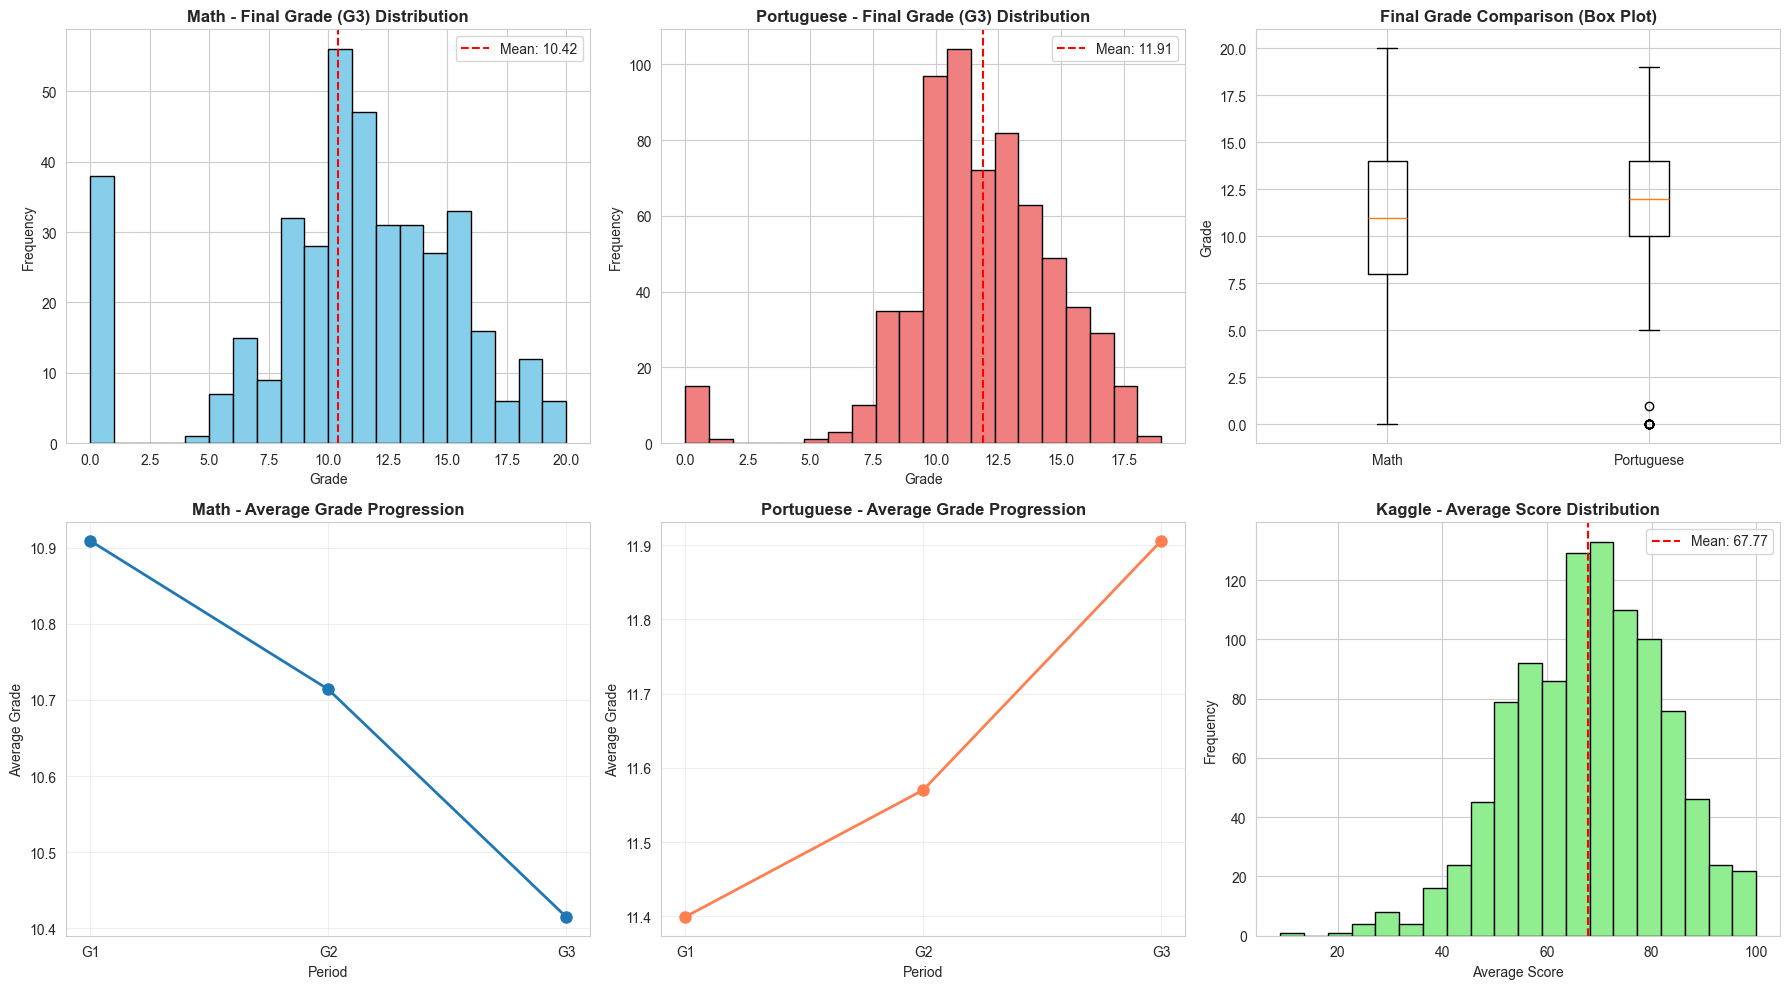

Key Observations:
- Math grades range: 0 to 20
- Portuguese grades range: 0 to 19
- Math average: 10.42 (±4.58)
- Portuguese average: 11.91 (±3.23)


In [13]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Math dataset - G3
axes[0, 0].hist(df_math['G3'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Math - Final Grade (G3) Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Grade')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df_math['G3'].mean(), color='red', linestyle='--', label=f'Mean: {df_math["G3"].mean():.2f}')
axes[0, 0].legend()

# Portuguese dataset - G3
axes[0, 1].hist(df_por['G3'], bins=20, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Portuguese - Final Grade (G3) Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Grade')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df_por['G3'].mean(), color='red', linestyle='--', label=f'Mean: {df_por["G3"].mean():.2f}')
axes[0, 1].legend()

# Box plots for outlier detection
axes[0, 2].boxplot([df_math['G3'], df_por['G3']], labels=['Math', 'Portuguese'])
axes[0, 2].set_title('Final Grade Comparison (Box Plot)', fontsize=12, fontweight='bold')
axes[0, 2].set_ylabel('Grade')

# Grade progression in Math
axes[1, 0].plot(df_math[['G1', 'G2', 'G3']].mean(), marker='o', linewidth=2, markersize=8)
axes[1, 0].set_title('Math - Average Grade Progression', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Period')
axes[1, 0].set_ylabel('Average Grade')
axes[1, 0].set_xticks([0, 1, 2])
axes[1, 0].set_xticklabels(['G1', 'G2', 'G3'])
axes[1, 0].grid(True, alpha=0.3)

# Grade progression in Portuguese
axes[1, 1].plot(df_por[['G1', 'G2', 'G3']].mean(), marker='o', linewidth=2, markersize=8, color='coral')
axes[1, 1].set_title('Portuguese - Average Grade Progression', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Period')
axes[1, 1].set_ylabel('Average Grade')
axes[1, 1].set_xticks([0, 1, 2])
axes[1, 1].set_xticklabels(['G1', 'G2', 'G3'])
axes[1, 1].grid(True, alpha=0.3)

# Kaggle dataset - average score
if 'math score' in df_kaggle.columns:
    avg_scores = df_kaggle[['math score', 'reading score', 'writing score']].mean(axis=1)
    axes[1, 2].hist(avg_scores, bins=20, color='lightgreen', edgecolor='black')
    axes[1, 2].set_title('Kaggle - Average Score Distribution', fontsize=12, fontweight='bold')
    axes[1, 2].set_xlabel('Average Score')
    axes[1, 2].set_ylabel('Frequency')
    axes[1, 2].axvline(avg_scores.mean(), color='red', linestyle='--', label=f'Mean: {avg_scores.mean():.2f}')
    axes[1, 2].legend()

plt.tight_layout()
plt.show()

print("Key Observations:")
print(f"- Math grades range: {df_math['G3'].min()} to {df_math['G3'].max()}")
print(f"- Portuguese grades range: {df_por['G3'].min()} to {df_por['G3'].max()}")
print(f"- Math average: {df_math['G3'].mean():.2f} (±{df_math['G3'].std():.2f})")
print(f"- Portuguese average: {df_por['G3'].mean():.2f} (±{df_por['G3'].std():.2f})")

##### Although the initial plan included the Students Exam Performance (Kaggle) dataset, we made the strategic decision to exclude it from the final analysis.This decision was based on two key analytical constraints:Structural Incompatibility: The Kaggle dataset contained a significantly different and reduced feature set compared to the rich UCI Student Performance data (33 features). Merging them would have necessitated either complex, high-risk feature imputation or the critical loss of dozens of valuable socio-demographic and habit features from the UCI data, compromising the depth of our analysis.Incompatibility with Core Scenarios: Our project is defined by comparing prediction performance WITH G1/G2 and WITHOUT G1/G2. The Kaggle dataset typically lacks these specific intermediate grading variables ($\text{G1}$ and $\text{G2}$), making it unusable within our central two-scenario comparison framework.Therefore, to maintain the integrity and focus of the comparative analysis, we proceeded solely with the combined UCI datasets.

### 3.2 Correlation Analysis

**Why correlation analysis?**  
- Identify features strongly related to target
- Detect multicollinearity between features
- Guide feature selection

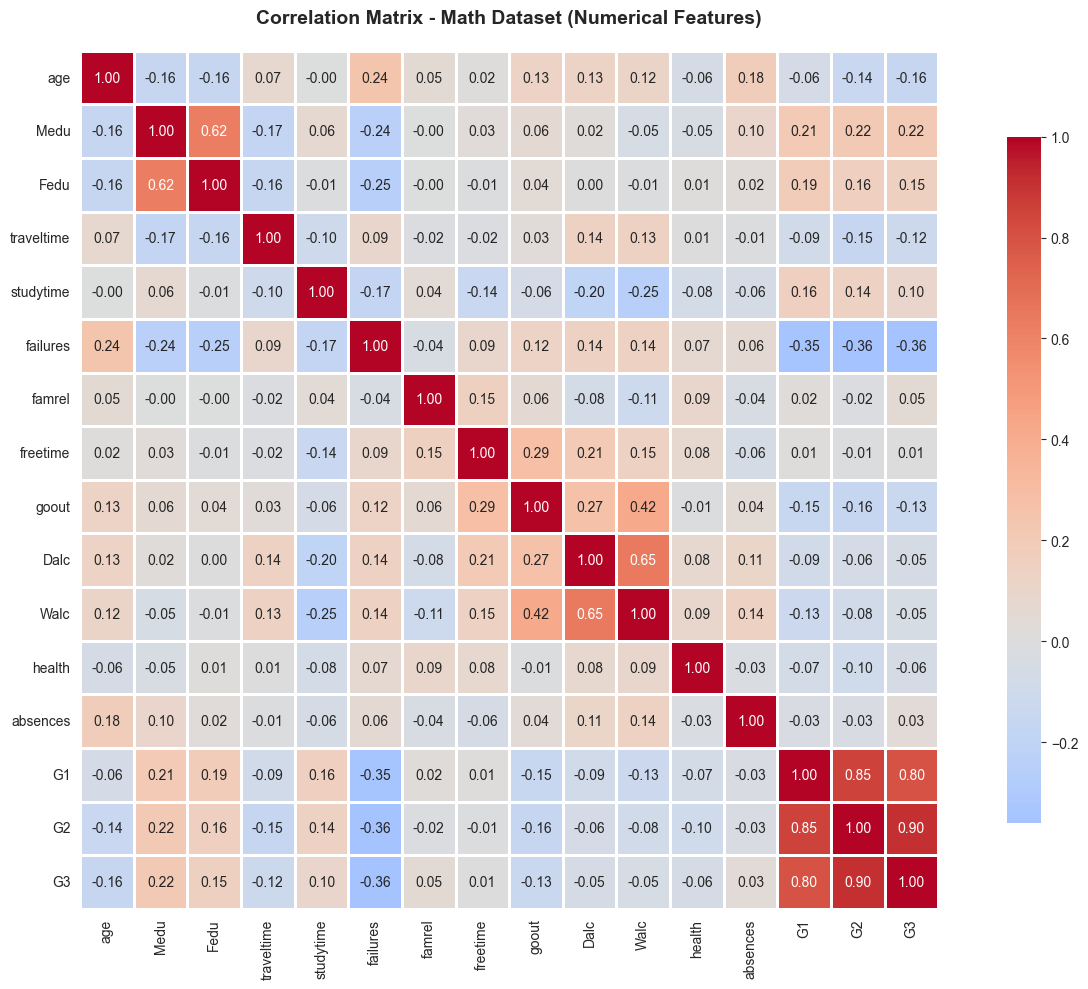


Top 10 Features Correlated with Final Grade (G3):

G3           1.000000
G2           0.904868
G1           0.801468
Medu         0.217147
Fedu         0.152457
studytime    0.097820
famrel       0.051363
absences     0.034247
freetime     0.011307
Walc        -0.051939
Dalc        -0.054660
Name: G3, dtype: float64

Important Findings:
- G2 and G1 have very high correlation with G3 (expected - they're previous grades)
- We'll create two models: one WITH G1/G2 and one WITHOUT to see real predictive power


In [14]:
# Correlation heatmap for Math dataset
plt.figure(figsize=(14, 10))
correlation_matrix = df_math[numerical_features + ['G1', 'G2', 'G3']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Math Dataset (Numerical Features)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Top correlations with G3
print("\nTop 10 Features Correlated with Final Grade (G3):\n")
correlations = correlation_matrix['G3'].sort_values(ascending=False)
print(correlations.head(11))  # Top 10 + G3 itself

print("\nImportant Findings:")
print("- G2 and G1 have very high correlation with G3 (expected - they're previous grades)")
print("- We'll create two models: one WITH G1/G2 and one WITHOUT to see real predictive power")

### 3.3 Feature Relationships with Target

**Visualizing relationships**  
Visual analysis reveals non-linear patterns that correlation coefficients might miss.

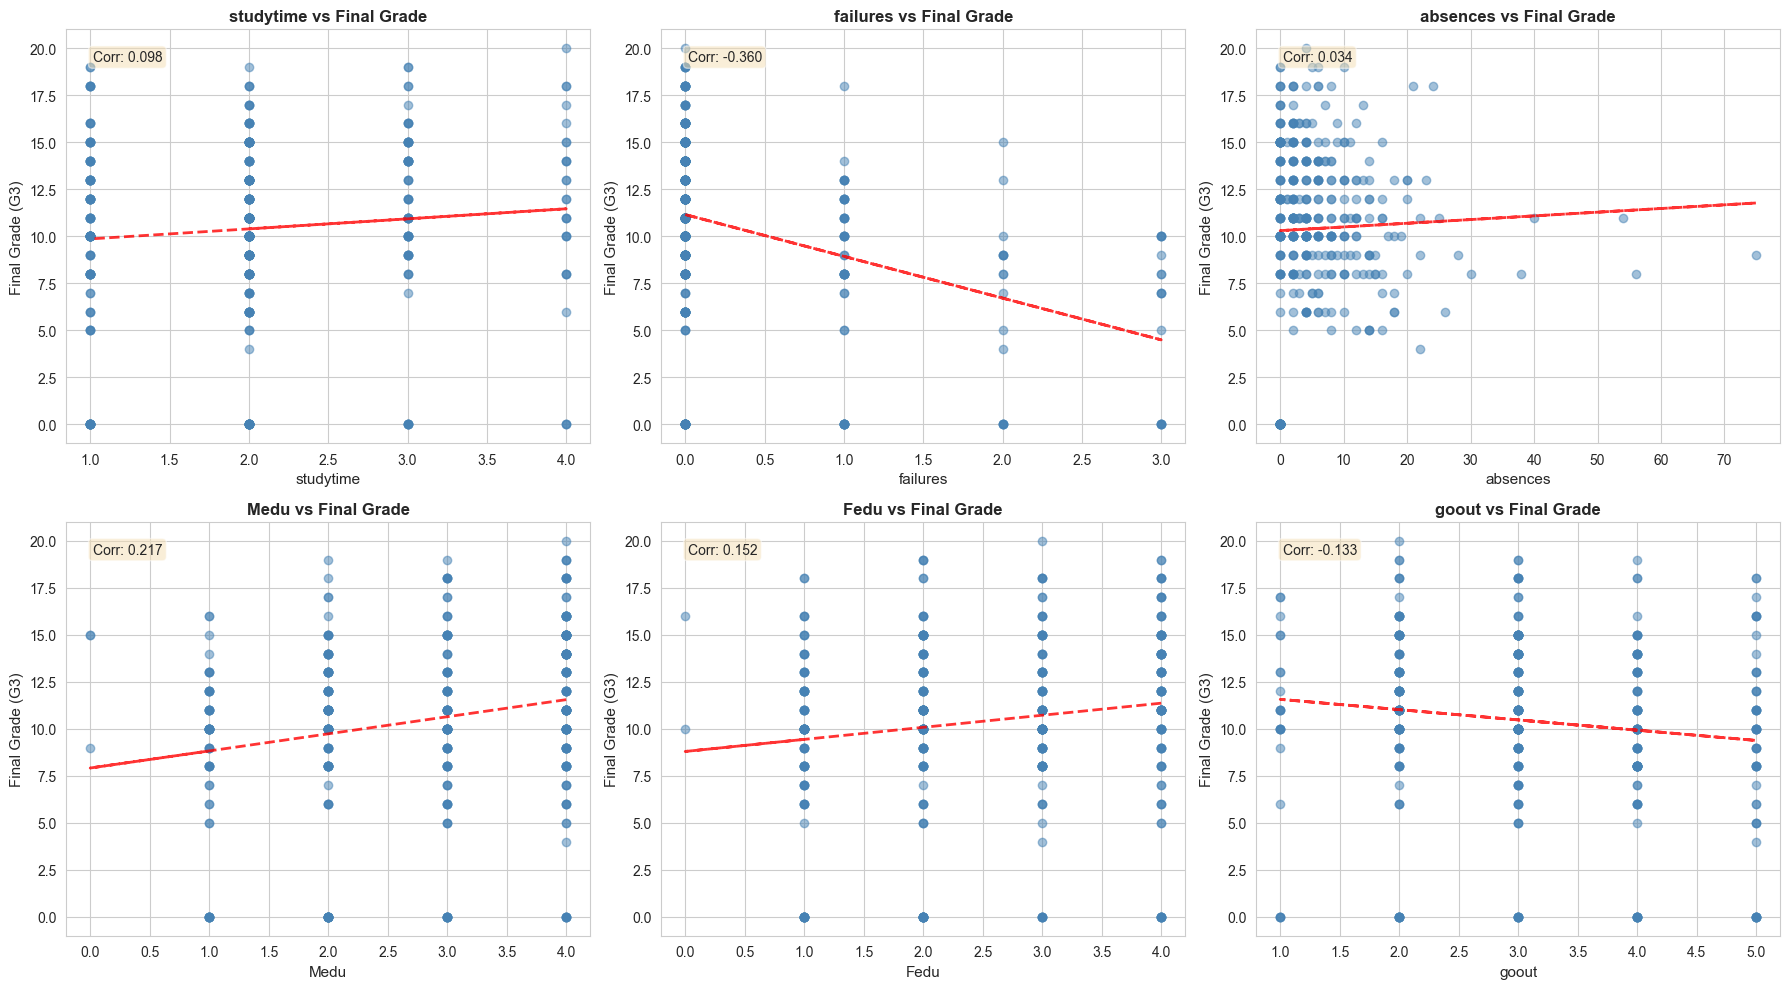

In [15]:
# Select key features for visualization
key_features = ['studytime', 'failures', 'absences', 'Medu', 'Fedu', 'goout']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    axes[idx].scatter(df_math[feature], df_math['G3'], alpha=0.5, color='steelblue')
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel('Final Grade (G3)', fontsize=11)
    axes[idx].set_title(f'{feature} vs Final Grade', fontsize=12, fontweight='bold')
    
    # Add trend line
    z = np.polyfit(df_math[feature], df_math['G3'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df_math[feature], p(df_math[feature]), "r--", alpha=0.8, linewidth=2)
    
    # Calculate correlation
    corr = df_math[feature].corr(df_math['G3'])
    axes[idx].text(0.05, 0.95, f'Corr: {corr:.3f}', transform=axes[idx].transAxes, 
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

### 3.4 Categorical Features Analysis

**Analyzing categorical features**  
Understanding how categories affect the target helps in:
- Feature selection
- Choosing encoding methods
- Identifying important factors

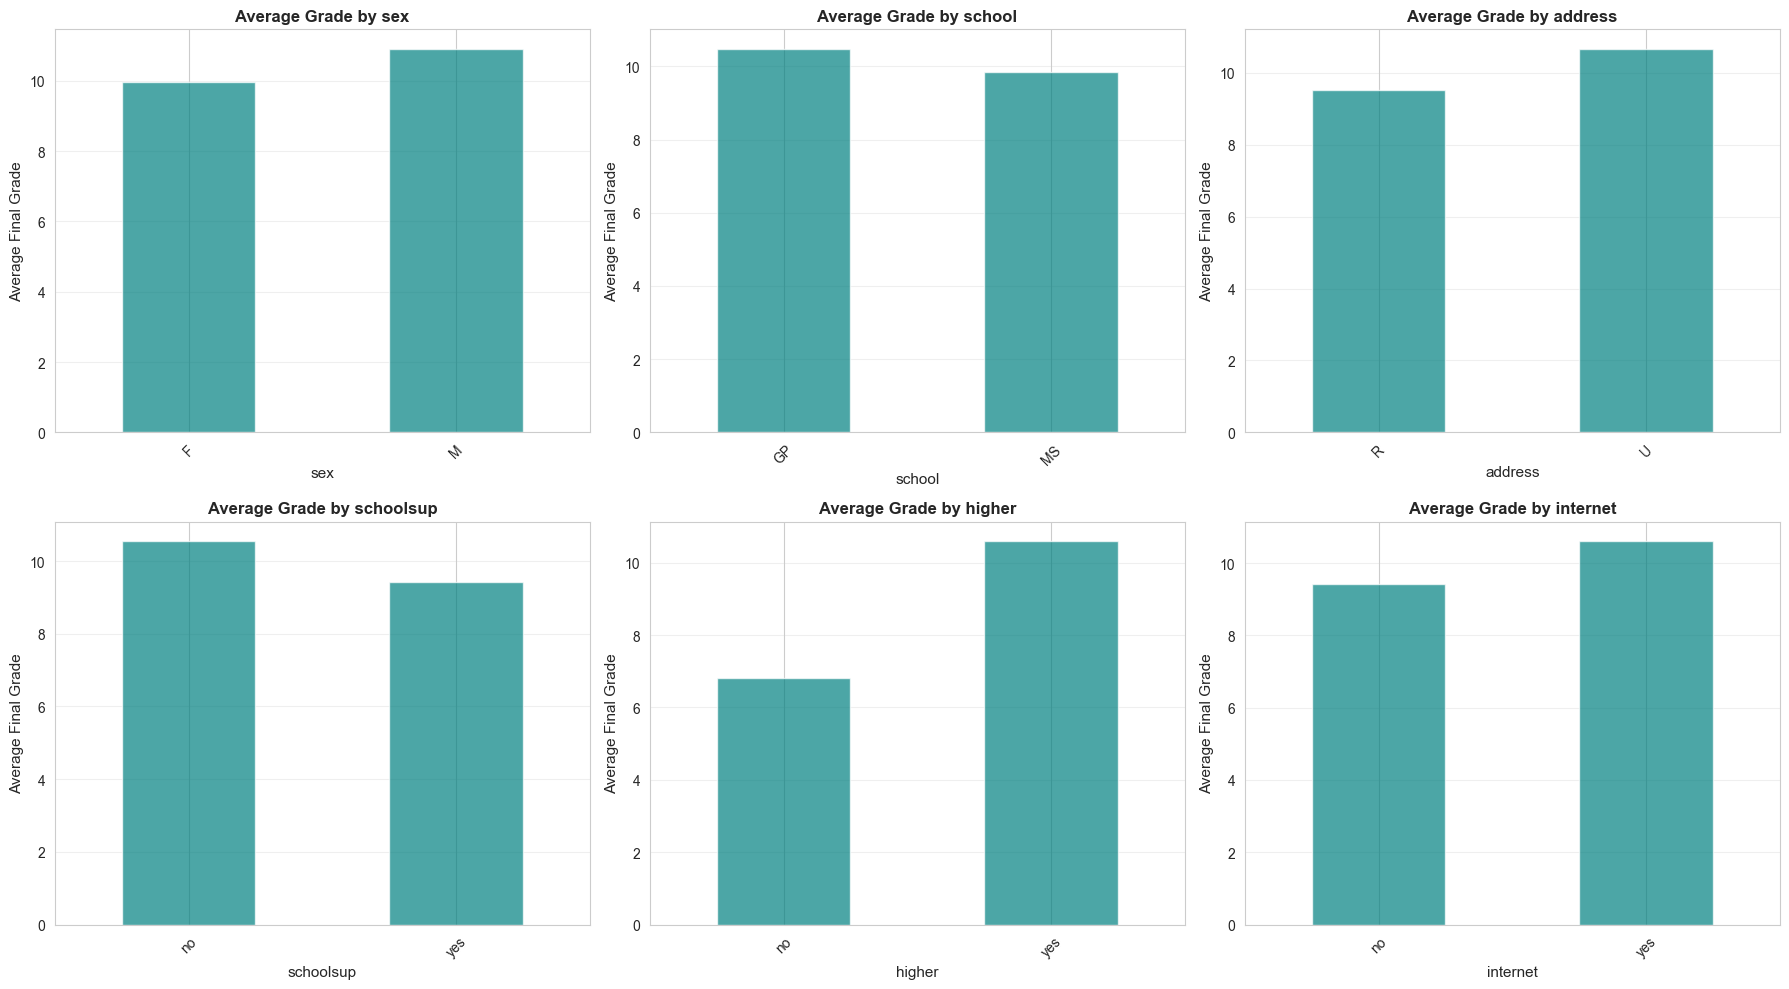


Categorical Feature Insights:

sex:
sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

school:
school
GP    10.489971
MS     9.847826
Name: G3, dtype: float64

address:
address
R     9.511364
U    10.674267
Name: G3, dtype: float64

schoolsup:
schoolsup
no     10.561047
yes     9.431373
Name: G3, dtype: float64

higher:
higher
no      6.800
yes    10.608
Name: G3, dtype: float64

internet:
internet
no      9.409091
yes    10.617021
Name: G3, dtype: float64


In [16]:
# Analyze key categorical features
cat_features_to_plot = ['sex', 'school', 'address', 'schoolsup', 'higher', 'internet']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(cat_features_to_plot):
    df_math.groupby(feature)['G3'].mean().plot(kind='bar', ax=axes[idx], color='teal', alpha=0.7)
    axes[idx].set_title(f'Average Grade by {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel('Average Final Grade', fontsize=11)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nCategorical Feature Insights:")
for feature in cat_features_to_plot:
    avg_by_cat = df_math.groupby(feature)['G3'].mean()
    print(f"\n{feature}:")
    print(avg_by_cat)

---
## 4. Data Preprocessing

### Why preprocessing?
- **Handle missing values**: Prevents errors during training
- **Encode categorical variables**: ML models need numerical input
- **Scale features**: Ensures fair contribution from all features
- **Split data**: Prevents data leakage and enables proper evaluation

### 4.1 Combine Datasets

**Combining Math and Portuguese**  
- Increases sample size (better for model training)
- Improves generalization
- We'll add a 'subject' feature to preserve this information

In [17]:
# Add subject identifier
df_math['subject'] = 'Math'
df_por['subject'] = 'Portuguese'

# Combine datasets
df_combined = pd.concat([df_math, df_por], axis=0, ignore_index=True)

print(f"Combined Dataset Shape: {df_combined.shape}")
print(f"   - Math samples: {len(df_math)}")
print(f"   - Portuguese samples: {len(df_por)}")
print(f"   - Total samples: {len(df_combined)}")
print(f"\nSubject distribution:")
print(df_combined['subject'].value_counts())

Combined Dataset Shape: (1044, 34)
   - Math samples: 395
   - Portuguese samples: 649
   - Total samples: 1044

Subject distribution:
subject
Portuguese    649
Math          395
Name: count, dtype: int64


### 4.2 Handle Missing Values

**Strategy:**  
- Check for missing values
- Decide on imputation strategy if needed

In [18]:
print("Missing Values Check:\n")
missing_values = df_combined.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values found! Dataset is clean.")
else:
    print(missing_values[missing_values > 0])
    print("\nWe'll need to handle these missing values.")

Missing Values Check:

No missing values found! Dataset is clean.


### 4.3 Feature Engineering

**creating new features**  
Domain knowledge can help create more informative features:
- **Total alcohol consumption**: Combine weekday and weekend
- **Parent education level**: Average of mother's and father's education
- **Study-to-freetime ratio**: Balance between study and leisure

In [19]:
# Create engineered features
df_combined['total_alc'] = df_combined['Dalc'] + df_combined['Walc']
df_combined['parent_edu'] = (df_combined['Medu'] + df_combined['Fedu']) / 2
df_combined['study_freetime_ratio'] = df_combined['studytime'] / (df_combined['freetime'] + 1)  # +1 to avoid division by zero

# Binary feature: has any failures
df_combined['has_failures'] = (df_combined['failures'] > 0).astype(int)

# Social activity score
df_combined['social_score'] = df_combined['goout'] + df_combined['freetime']

print("Engineered Features Created:")
print("  - total_alc: Total alcohol consumption")
print("  - parent_edu: Average parent education level")
print("  - study_freetime_ratio: Study to free time ratio")
print("  - has_failures: Binary indicator of past failures")
print("  - social_score: Combined social activity metric")
print(f"\nNew dataset shape: {df_combined.shape}")

Engineered Features Created:
  - total_alc: Total alcohol consumption
  - parent_edu: Average parent education level
  - study_freetime_ratio: Study to free time ratio
  - has_failures: Binary indicator of past failures
  - social_score: Combined social activity metric

New dataset shape: (1044, 39)


### 4.4 Prepare Features and Target

**Critical Decision: Should we include G1 and G2?**

**Two Scenarios:**
1. **With G1/G2**: Predicting final grade when we have intermediate grades (realistic for mid-semester prediction)
2. **Without G1/G2**: Predicting final grade from socio-demographic factors only (realistic for pre-enrollment prediction)

We'll train both models to show the difference!

In [20]:
# Define feature sets
numerical_features_extended = numerical_features + ['total_alc', 'parent_edu', 'study_freetime_ratio', 
                                                     'has_failures', 'social_score']
categorical_features_extended = categorical_features + ['subject']

# Scenario 1: WITHOUT G1 and G2 (pure prediction from demographics)
features_without_grades = [f for f in numerical_features_extended if f not in ['G1', 'G2']] + categorical_features_extended

# Scenario 2: WITH G1 and G2 (mid-semester prediction)
features_with_grades = numerical_features_extended + ['G1', 'G2'] + categorical_features_extended

print("Feature Sets Defined:")
print(f"\n1️ WITHOUT intermediate grades: {len(features_without_grades)} features")
print(f"2️ WITH intermediate grades: {len(features_with_grades)} features")
print(f"\nTarget: G3 (Final Grade)")

Feature Sets Defined:

1️ WITHOUT intermediate grades: 36 features
2️ WITH intermediate grades: 38 features

Target: G3 (Final Grade)


### 4.5 Encode Categorical Variables

**One-Hot Encoding**  
- Preserves all categorical information
- No ordinal assumption (unlike label encoding)
- Works well with tree-based and linear models

In [21]:
# Create a copy for encoding
df_encoded = df_combined.copy()

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_encoded, columns=categorical_features_extended, drop_first=True)

print(f"Original shape: {df_combined.shape}")
print(f"Encoded shape: {df_encoded.shape}")
print(f"New columns created: {df_encoded.shape[1] - df_combined.shape[1]}")

Original shape: (1044, 39)
Encoded shape: (1044, 48)
New columns created: 9


### 4.6 Train-Test Split

**80-20 split**  
- 80% training: Enough data for model to learn patterns
- 20% testing: Sufficient for reliable evaluation
- Random state: Ensures reproducibility

**stratify** Not applicable here (regression), but we ensure random sampling.

In [22]:
# Prepare datasets for both scenarios

# Scenario 1: WITHOUT G1/G2
X_without = df_encoded.drop(['G1', 'G2', 'G3'], axis=1)
y = df_encoded['G3']

X_train_without, X_test_without, y_train, y_test = train_test_split(
    X_without, y, test_size=0.2, random_state=42
)

# Scenario 2: WITH G1/G2
X_with = df_encoded.drop(['G3'], axis=1)

X_train_with, X_test_with, y_train_with, y_test_with = train_test_split(
    X_with, y, test_size=0.2, random_state=42
)

print("Scenario 1 (WITHOUT G1/G2):")
print(f"Training set: {X_train_without.shape}")
print(f"Test set: {X_test_without.shape}")
print(f"\nScenario 2 (WITH G1/G2):")
print(f"Training set: {X_train_with.shape}")
print(f"Test set: {X_test_with.shape}")

Scenario 1 (WITHOUT G1/G2):
Training set: (835, 45)
Test set: (209, 45)

Scenario 2 (WITH G1/G2):
Training set: (835, 47)
Test set: (209, 47)


### 4.7 Feature Scaling

**StandardScaler**  
- Transforms features to have mean=0 and std=1
- Essential for distance-based algorithms (KNN, SVM)
- Improves convergence for gradient-based methods
- Tree-based models don't need it, but it doesn't hurt

In [23]:
# Initialize scalers
scaler_without = StandardScaler()
scaler_with = StandardScaler()

# Fit and transform training data, transform test data
X_train_without_scaled = scaler_without.fit_transform(X_train_without)
X_test_without_scaled = scaler_without.transform(X_test_without)

X_train_with_scaled = scaler_with.fit_transform(X_train_with)
X_test_with_scaled = scaler_with.transform(X_test_with)

print("We fit the scaler ONLY on training data to prevent data leakage!")
print("This ensures the test set remains truly unseen.")

We fit the scaler ONLY on training data to prevent data leakage!
This ensures the test set remains truly unseen.


---
## 5. Model Training & Selection

### multiple models?
Different algorithms have different strengths:
- **Linear models**: Fast, interpretable, work well with linear relationships
- **Tree-based models**: Handle non-linearity, feature interactions, robust to outliers
- **Ensemble methods**: Combine multiple models for better performance
- **Distance-based**: Capture local patterns

We'll train and compare them all!

### 5.1 Define Models

**Model Selection Rationale:**

In [24]:
# Define models with explanations
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'why': 'Baseline model. Assumes linear relationship. Fast and interpretable.'
    },
    'Ridge Regression': {
        'model': Ridge(alpha=1.0),
        'why': 'Linear regression with L2 regularization. Prevents overfitting by penalizing large coefficients.'
    },
    'Lasso Regression': {
        'model': Lasso(alpha=0.1),
        'why': 'Linear regression with L1 regularization. Can perform feature selection by zeroing out coefficients.'
    },
    'ElasticNet': {
        'model': ElasticNet(alpha=0.1, l1_ratio=0.5),
        'why': 'Combines L1 and L2 regularization. Best of both Ridge and Lasso.'
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(max_depth=10, random_state=42),
        'why': 'Non-linear model. Captures complex patterns and interactions. Prone to overfitting.'
    },
    'Random Forest': {
        'model': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
        'why': 'Ensemble of decision trees. Reduces overfitting through bagging. Very robust.'
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
        'why': 'Builds trees sequentially, each correcting previous errors. Often best performance.'
    },
    'AdaBoost': {
        'model': AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
        'why': 'Adaptive boosting. Focuses on hard-to-predict samples.'
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsRegressor(n_neighbors=5),
        'why': 'Non-parametric. Predicts based on similar samples. Sensitive to feature scaling.'
    },
    'Support Vector Regression': {
        'model': SVR(kernel='rbf', C=1.0, epsilon=0.1),
        'why': 'Finds optimal hyperplane with margin. RBF kernel handles non-linearity.'
    }
}

print("Models Defined:\n")
for name, info in models.items():
    print(f"* {name}")
    print(f"  Why: {info['why']}\n")

Models Defined:

* Linear Regression
  Why: Baseline model. Assumes linear relationship. Fast and interpretable.

* Ridge Regression
  Why: Linear regression with L2 regularization. Prevents overfitting by penalizing large coefficients.

* Lasso Regression
  Why: Linear regression with L1 regularization. Can perform feature selection by zeroing out coefficients.

* ElasticNet
  Why: Combines L1 and L2 regularization. Best of both Ridge and Lasso.

* Decision Tree
  Why: Non-linear model. Captures complex patterns and interactions. Prone to overfitting.

* Random Forest
  Why: Ensemble of decision trees. Reduces overfitting through bagging. Very robust.

* Gradient Boosting
  Why: Builds trees sequentially, each correcting previous errors. Often best performance.

* AdaBoost
  Why: Adaptive boosting. Focuses on hard-to-predict samples.

* K-Nearest Neighbors
  Why: Non-parametric. Predicts based on similar samples. Sensitive to feature scaling.

* Support Vector Regression
  Why: Finds 

### 5.2 Train Models - Scenario 1 (WITHOUT G1/G2)

**This scenario tests pure predictive power from socio-demographic factors.**

In [25]:
print("SCENARIO 1: PREDICTING FINAL GRADE WITHOUT INTERMEDIATE GRADES")
print("\nUse Case: Pre-enrollment prediction or early intervention\n")

results_without = {}

for name, info in models.items():
    print(f"Training {name}...", end=" ")
    
    model = info['model']
    
    # Train
    model.fit(X_train_without_scaled, y_train)
    
    # Predict
    y_pred_train = model.predict(X_train_without_scaled)
    y_pred_test = model.predict(X_test_without_scaled)
    
    # Evaluate
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    results_without[name] = {
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'predictions': y_pred_test
    }
    
    print(f"Test R²: {test_r2:.4f}, RMSE: {test_rmse:.4f}")

print("\nAll models trained!")

SCENARIO 1: PREDICTING FINAL GRADE WITHOUT INTERMEDIATE GRADES

Use Case: Pre-enrollment prediction or early intervention

Training Linear Regression... Test R²: 0.1282, RMSE: 3.6713
Training Ridge Regression... 

Test R²: 0.1286, RMSE: 3.6704
Training Lasso Regression... Test R²: 0.1429, RMSE: 3.6403
Training ElasticNet... Test R²: 0.1496, RMSE: 3.6260
Training Decision Tree... Test R²: -0.0982, RMSE: 4.1205
Training Random Forest... Test R²: 0.2127, RMSE: 3.4890
Training Gradient Boosting... Test R²: 0.2191, RMSE: 3.4747
Training AdaBoost... Test R²: 0.2396, RMSE: 3.4287
Training K-Nearest Neighbors... Test R²: 0.1618, RMSE: 3.6000
Training Support Vector Regression... Test R²: 0.2353, RMSE: 3.4385

All models trained!


### 5.3 Train Models - Scenario 2 (WITH G1/G2)

**This scenario tests prediction when intermediate grades are available.**

In [26]:
print("SCENARIO 2: PREDICTING FINAL GRADE WITH INTERMEDIATE GRADES")
print("\nUse Case: Mid-semester prediction for targeted support\n")

results_with = {}

for name, info in models.items():
    print(f"Training {name}...", end=" ")
    
    # Create new model instance (don't reuse trained models)
    if name == 'Linear Regression':
        model = LinearRegression()
    elif name == 'Ridge Regression':
        model = Ridge(alpha=1.0)
    elif name == 'Lasso Regression':
        model = Lasso(alpha=0.1)
    elif name == 'ElasticNet':
        model = ElasticNet(alpha=0.1, l1_ratio=0.5)
    elif name == 'Decision Tree':
        model = DecisionTreeRegressor(max_depth=10, random_state=42)
    elif name == 'Random Forest':
        model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    elif name == 'Gradient Boosting':
        model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
    elif name == 'AdaBoost':
        model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    elif name == 'K-Nearest Neighbors':
        model = KNeighborsRegressor(n_neighbors=5)
    elif name == 'Support Vector Regression':
        model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
    
    # Train
    model.fit(X_train_with_scaled, y_train_with)
    
    # Predict
    y_pred_train = model.predict(X_train_with_scaled)
    y_pred_test = model.predict(X_test_with_scaled)
    
    # Evaluate
    train_r2 = r2_score(y_train_with, y_pred_train)
    test_r2 = r2_score(y_test_with, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train_with, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test_with, y_pred_test))
    train_mae = mean_absolute_error(y_train_with, y_pred_train)
    test_mae = mean_absolute_error(y_test_with, y_pred_test)
    
    results_with[name] = {
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'predictions': y_pred_test
    }
    
    print(f"Test R²: {test_r2:.4f}, RMSE: {test_rmse:.4f}")

print("\nAll models trained!")

SCENARIO 2: PREDICTING FINAL GRADE WITH INTERMEDIATE GRADES

Use Case: Mid-semester prediction for targeted support

Training Linear Regression... Test R²: 0.8023, RMSE: 1.7483
Training Ridge Regression... Test R²: 0.8022, RMSE: 1.7487
Training Lasso Regression... Test R²: 0.8163, RMSE: 1.6852
Training ElasticNet... Test R²: 0.8074, RMSE: 1.7256
Training Decision Tree... Test R²: 0.6962, RMSE: 2.1671
Training Random Forest... Test R²: 0.8212, RMSE: 1.6627
Training Gradient Boosting... Test R²: 0.8235, RMSE: 1.6518
Training AdaBoost... Test R²: 0.8267, RMSE: 1.6371
Training K-Nearest Neighbors... Test R²: 0.4496, RMSE: 2.9172
Training Support Vector Regression... Test R²: 0.6787, RMSE: 2.2290

All models trained!


---
## 6. Model Evaluation & Comparison

### Understanding Metrics:
- **R² Score**: Proportion of variance explained (0-1, higher is better)
- **RMSE**: Root Mean Squared Error (lower is better, same units as target)
- **MAE**: Mean Absolute Error (lower is better, more interpretable than RMSE)

### 6.1 Results Comparison - Scenario 1 (WITHOUT G1/G2)

In [27]:
# Create results dataframe
results_df_without = pd.DataFrame({
    'Model': list(results_without.keys()),
    'Train R²': [results_without[m]['train_r2'] for m in results_without.keys()],
    'Test R²': [results_without[m]['test_r2'] for m in results_without.keys()],
    'Train RMSE': [results_without[m]['train_rmse'] for m in results_without.keys()],
    'Test RMSE': [results_without[m]['test_rmse'] for m in results_without.keys()],
    'Train MAE': [results_without[m]['train_mae'] for m in results_without.keys()],
    'Test MAE': [results_without[m]['test_mae'] for m in results_without.keys()],
})

# Calculate overfitting indicator
results_df_without['Overfitting'] = results_df_without['Train R²'] - results_df_without['Test R²']

# Sort by Test R²
results_df_without = results_df_without.sort_values('Test R²', ascending=False)

print("SCENARIO 1 RESULTS: WITHOUT INTERMEDIATE GRADES (G1, G2)")
print(results_df_without.to_string(index=False))
print("\nInterpretation:")
print("  - Higher R² = Better model fit")
print("  - Lower RMSE/MAE = Better predictions")
print("  - Large Overfitting value = Model memorizing training data")

SCENARIO 1 RESULTS: WITHOUT INTERMEDIATE GRADES (G1, G2)
                    Model  Train R²   Test R²  Train RMSE  Test RMSE  Train MAE  Test MAE  Overfitting
                 AdaBoost  0.390164  0.239633    3.000422   3.428688   2.338872  2.629054     0.150531
Support Vector Regression  0.415941  0.235287    2.936325   3.438471   1.828670  2.377933     0.180654
        Gradient Boosting  0.906018  0.219076    1.177870   3.474726   0.863790  2.521159     0.686942
            Random Forest  0.817133  0.212667    1.643022   3.488957   1.231904  2.576986     0.604466
      K-Nearest Neighbors  0.458904  0.161752    2.826267   3.600000   2.026108  2.622010     0.297152
               ElasticNet  0.312856  0.149613    3.184928   3.625974   2.317738  2.599284     0.163244
         Lasso Regression  0.303964  0.142873    3.205469   3.640313   2.334935  2.627019     0.161091
         Ridge Regression  0.323057  0.128629    3.161199   3.670438   2.321666  2.615572     0.194429
        Linear R

### 6.2 Results Comparison - Scenario 2 (WITH G1/G2)

In [28]:
# Create results dataframe
results_df_with = pd.DataFrame({
    'Model': list(results_with.keys()),
    'Train R²': [results_with[m]['train_r2'] for m in results_with.keys()],
    'Test R²': [results_with[m]['test_r2'] for m in results_with.keys()],
    'Train RMSE': [results_with[m]['train_rmse'] for m in results_with.keys()],
    'Test RMSE': [results_with[m]['test_rmse'] for m in results_with.keys()],
    'Train MAE': [results_with[m]['train_mae'] for m in results_with.keys()],
    'Test MAE': [results_with[m]['test_mae'] for m in results_with.keys()],
})

# Calculate overfitting indicator
results_df_with['Overfitting'] = results_df_with['Train R²'] - results_df_with['Test R²']

# Sort by Test R²
results_df_with = results_df_with.sort_values('Test R²', ascending=False)

print("SCENARIO 2 RESULTS: WITH INTERMEDIATE GRADES (G1, G2)")
print(results_df_with.to_string(index=False))
print("\nInterpretation:")
print("  - Much higher R² expected due to strong correlation between G1/G2 and G3")
print("  - This scenario is useful for mid-semester interventions")

SCENARIO 2 RESULTS: WITH INTERMEDIATE GRADES (G1, G2)
                    Model  Train R²  Test R²  Train RMSE  Test RMSE  Train MAE  Test MAE  Overfitting
                 AdaBoost  0.865650 0.826662    1.408298   1.637054   0.995977  1.028477     0.038988
        Gradient Boosting  0.987922 0.823530    0.422262   1.651780   0.317562  0.989784     0.164392
            Random Forest  0.976193 0.821182    0.592826   1.662730   0.392921  0.958519     0.155011
         Lasso Regression  0.846128 0.816323    1.507145   1.685172   0.887421  0.888335     0.029806
               ElasticNet  0.846772 0.807405    1.503989   1.725593   0.906804  0.943409     0.039367
        Linear Regression  0.855072 0.802305    1.462688   1.748294   0.928105  1.015378     0.052767
         Ridge Regression  0.855069 0.802220    1.462703   1.748667   0.927693  1.015285     0.052849
            Decision Tree  0.991218 0.696245    0.360064   2.167095   0.196496  1.181309     0.294973
Support Vector Regression  0

### 6.3 Visual Comparison

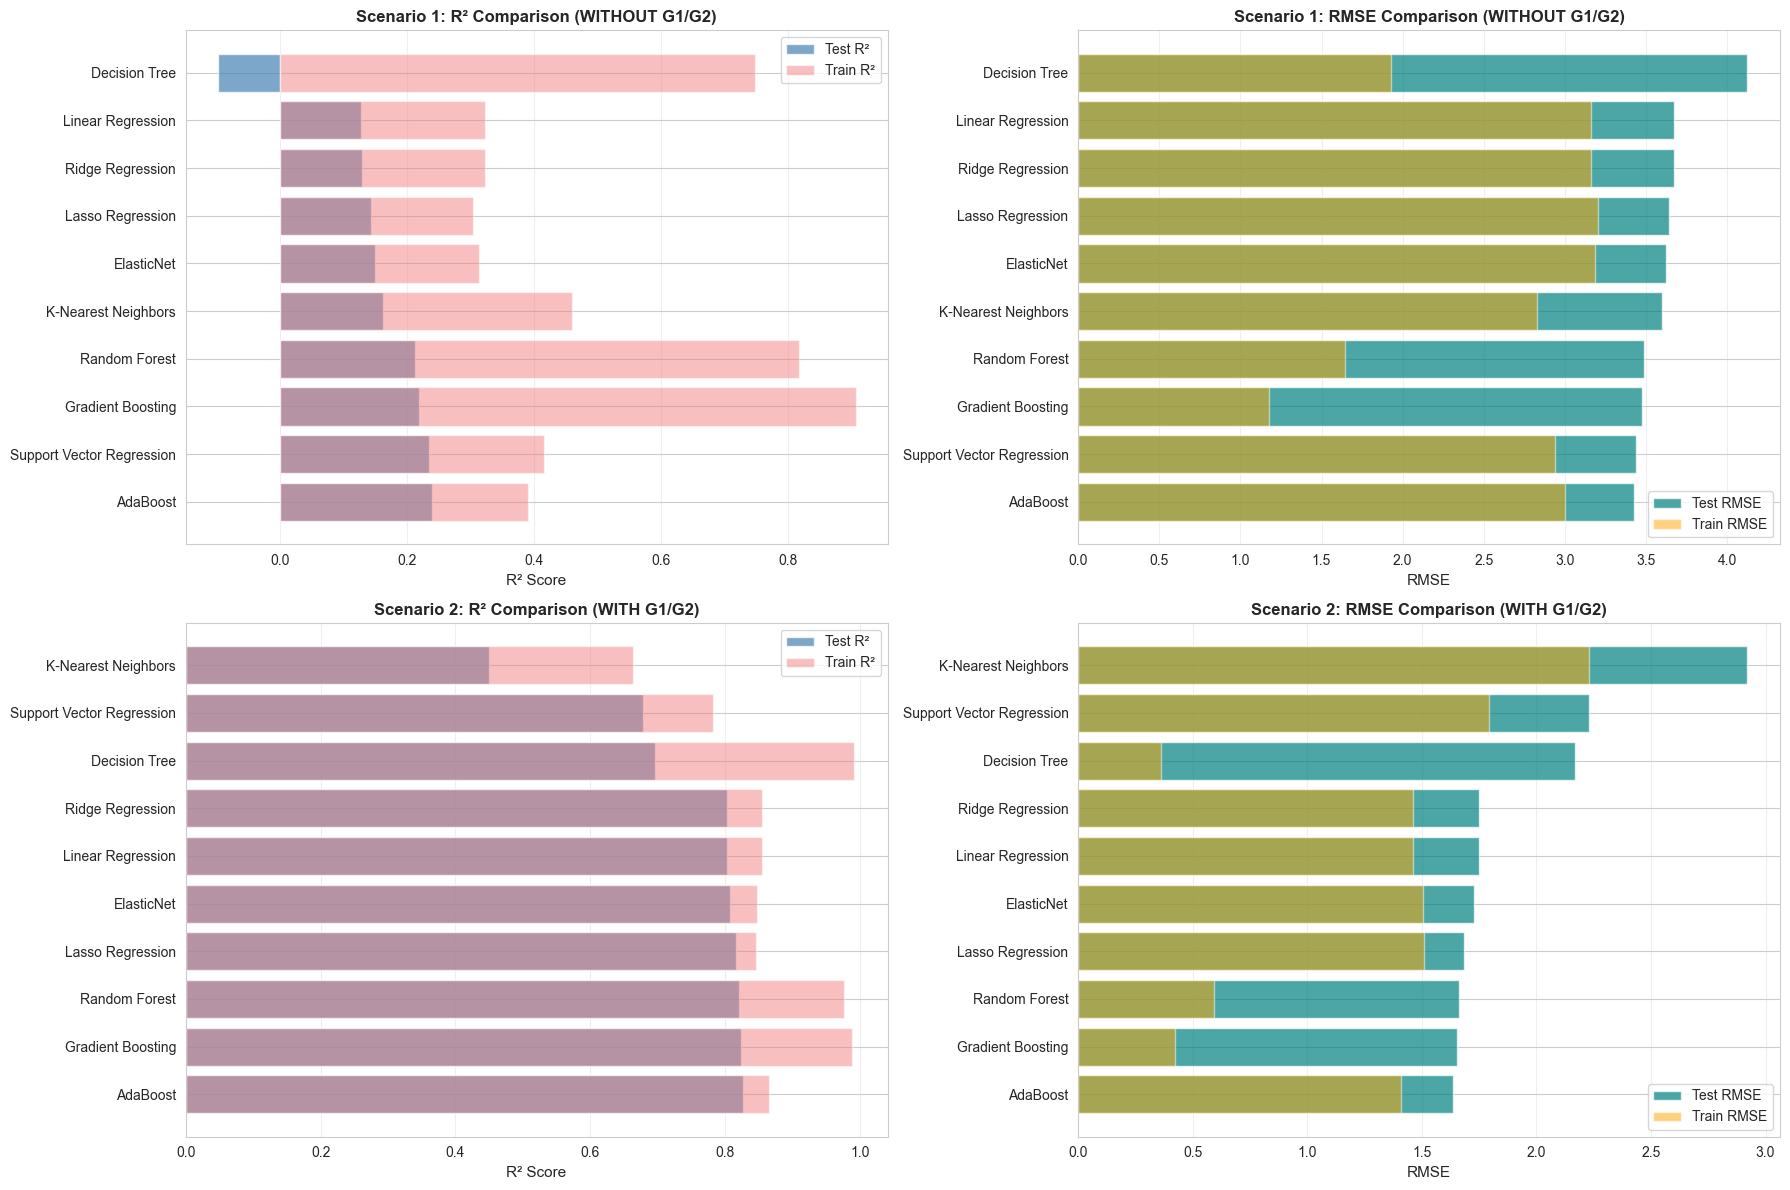

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Scenario 1 - R² Comparison
ax1 = axes[0, 0]
x_pos = np.arange(len(results_df_without))
ax1.barh(x_pos, results_df_without['Test R²'], color='steelblue', alpha=0.7, label='Test R²')
ax1.barh(x_pos, results_df_without['Train R²'], color='lightcoral', alpha=0.5, label='Train R²')
ax1.set_yticks(x_pos)
ax1.set_yticklabels(results_df_without['Model'])
ax1.set_xlabel('R² Score', fontsize=11)
ax1.set_title('Scenario 1: R² Comparison (WITHOUT G1/G2)', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(axis='x', alpha=0.3)

# Scenario 1 - RMSE Comparison
ax2 = axes[0, 1]
ax2.barh(x_pos, results_df_without['Test RMSE'], color='teal', alpha=0.7, label='Test RMSE')
ax2.barh(x_pos, results_df_without['Train RMSE'], color='orange', alpha=0.5, label='Train RMSE')
ax2.set_yticks(x_pos)
ax2.set_yticklabels(results_df_without['Model'])
ax2.set_xlabel('RMSE', fontsize=11)
ax2.set_title('Scenario 1: RMSE Comparison (WITHOUT G1/G2)', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(axis='x', alpha=0.3)

# Scenario 2 - R² Comparison
ax3 = axes[1, 0]
x_pos2 = np.arange(len(results_df_with))
ax3.barh(x_pos2, results_df_with['Test R²'], color='steelblue', alpha=0.7, label='Test R²')
ax3.barh(x_pos2, results_df_with['Train R²'], color='lightcoral', alpha=0.5, label='Train R²')
ax3.set_yticks(x_pos2)
ax3.set_yticklabels(results_df_with['Model'])
ax3.set_xlabel('R² Score', fontsize=11)
ax3.set_title('Scenario 2: R² Comparison (WITH G1/G2)', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(axis='x', alpha=0.3)

# Scenario 2 - RMSE Comparison
ax4 = axes[1, 1]
ax4.barh(x_pos2, results_df_with['Test RMSE'], color='teal', alpha=0.7, label='Test RMSE')
ax4.barh(x_pos2, results_df_with['Train RMSE'], color='orange', alpha=0.5, label='Train RMSE')
ax4.set_yticks(x_pos2)
ax4.set_yticklabels(results_df_with['Model'])
ax4.set_xlabel('RMSE', fontsize=11)
ax4.set_title('Scenario 2: RMSE Comparison (WITH G1/G2)', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### 6.4 Prediction vs Actual Plots (Best Models)

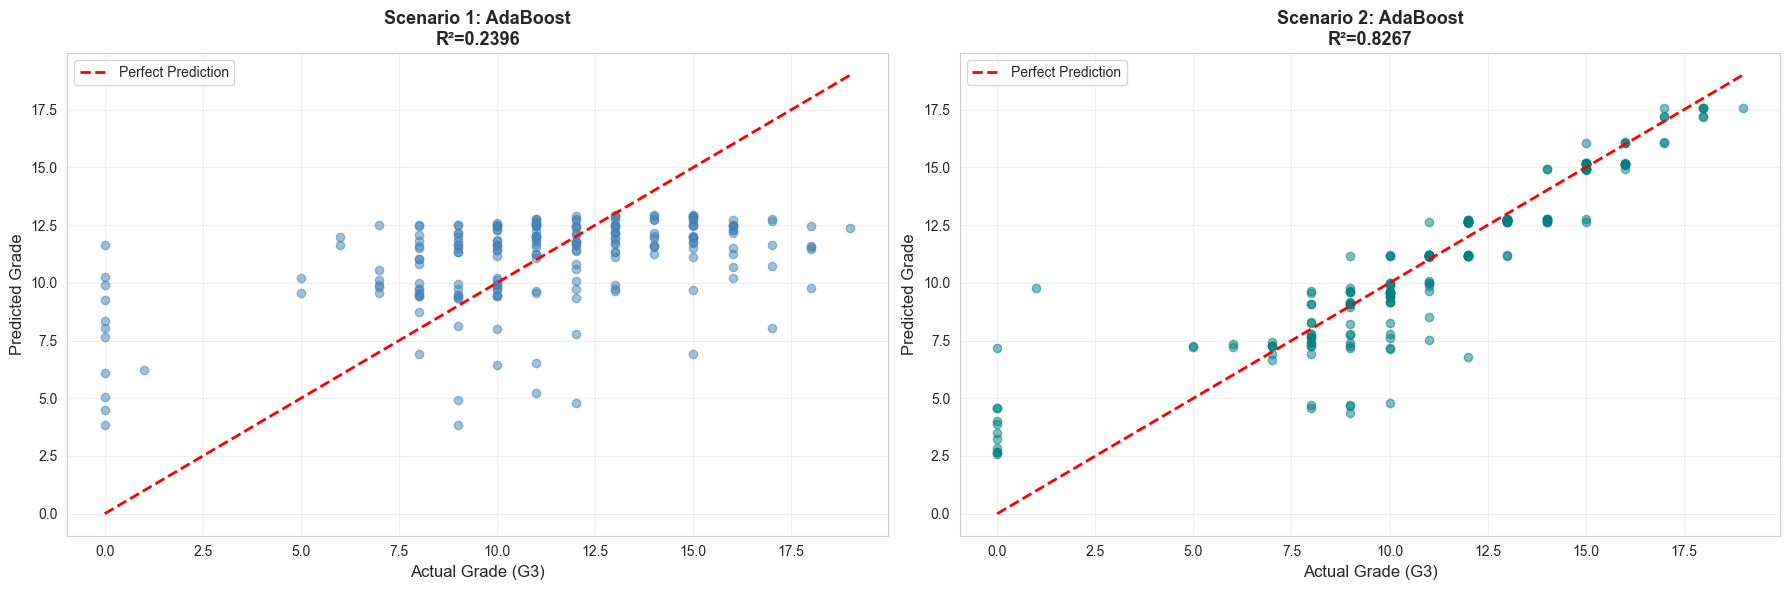


Best Models:
  Scenario 1 (WITHOUT G1/G2): AdaBoost
  Scenario 2 (WITH G1/G2): AdaBoost


In [30]:
# Get best models
best_model_without = results_df_without.iloc[0]['Model']
best_model_with = results_df_with.iloc[0]['Model']

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Scenario 1 - Best model predictions
ax1 = axes[0]
predictions_without = results_without[best_model_without]['predictions']
ax1.scatter(y_test, predictions_without, alpha=0.5, color='steelblue')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Grade (G3)', fontsize=12)
ax1.set_ylabel('Predicted Grade', fontsize=12)
ax1.set_title(f'Scenario 1: {best_model_without}\nR²={results_without[best_model_without]["test_r2"]:.4f}', 
              fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Scenario 2 - Best model predictions
ax2 = axes[1]
predictions_with = results_with[best_model_with]['predictions']
ax2.scatter(y_test_with, predictions_with, alpha=0.5, color='teal')
ax2.plot([y_test_with.min(), y_test_with.max()], [y_test_with.min(), y_test_with.max()], 'r--', lw=2, label='Perfect Prediction')
ax2.set_xlabel('Actual Grade (G3)', fontsize=12)
ax2.set_ylabel('Predicted Grade', fontsize=12)
ax2.set_title(f'Scenario 2: {best_model_with}\nR²={results_with[best_model_with]["test_r2"]:.4f}', 
              fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nBest Models:")
print(f"  Scenario 1 (WITHOUT G1/G2): {best_model_without}")
print(f"  Scenario 2 (WITH G1/G2): {best_model_with}")

### 6.5 Residual Analysis

**Why analyze residuals?**  
Residuals (actual - predicted) help us understand:
- If errors are randomly distributed (good)
- If there are systematic biases (bad)
- If model assumptions are met

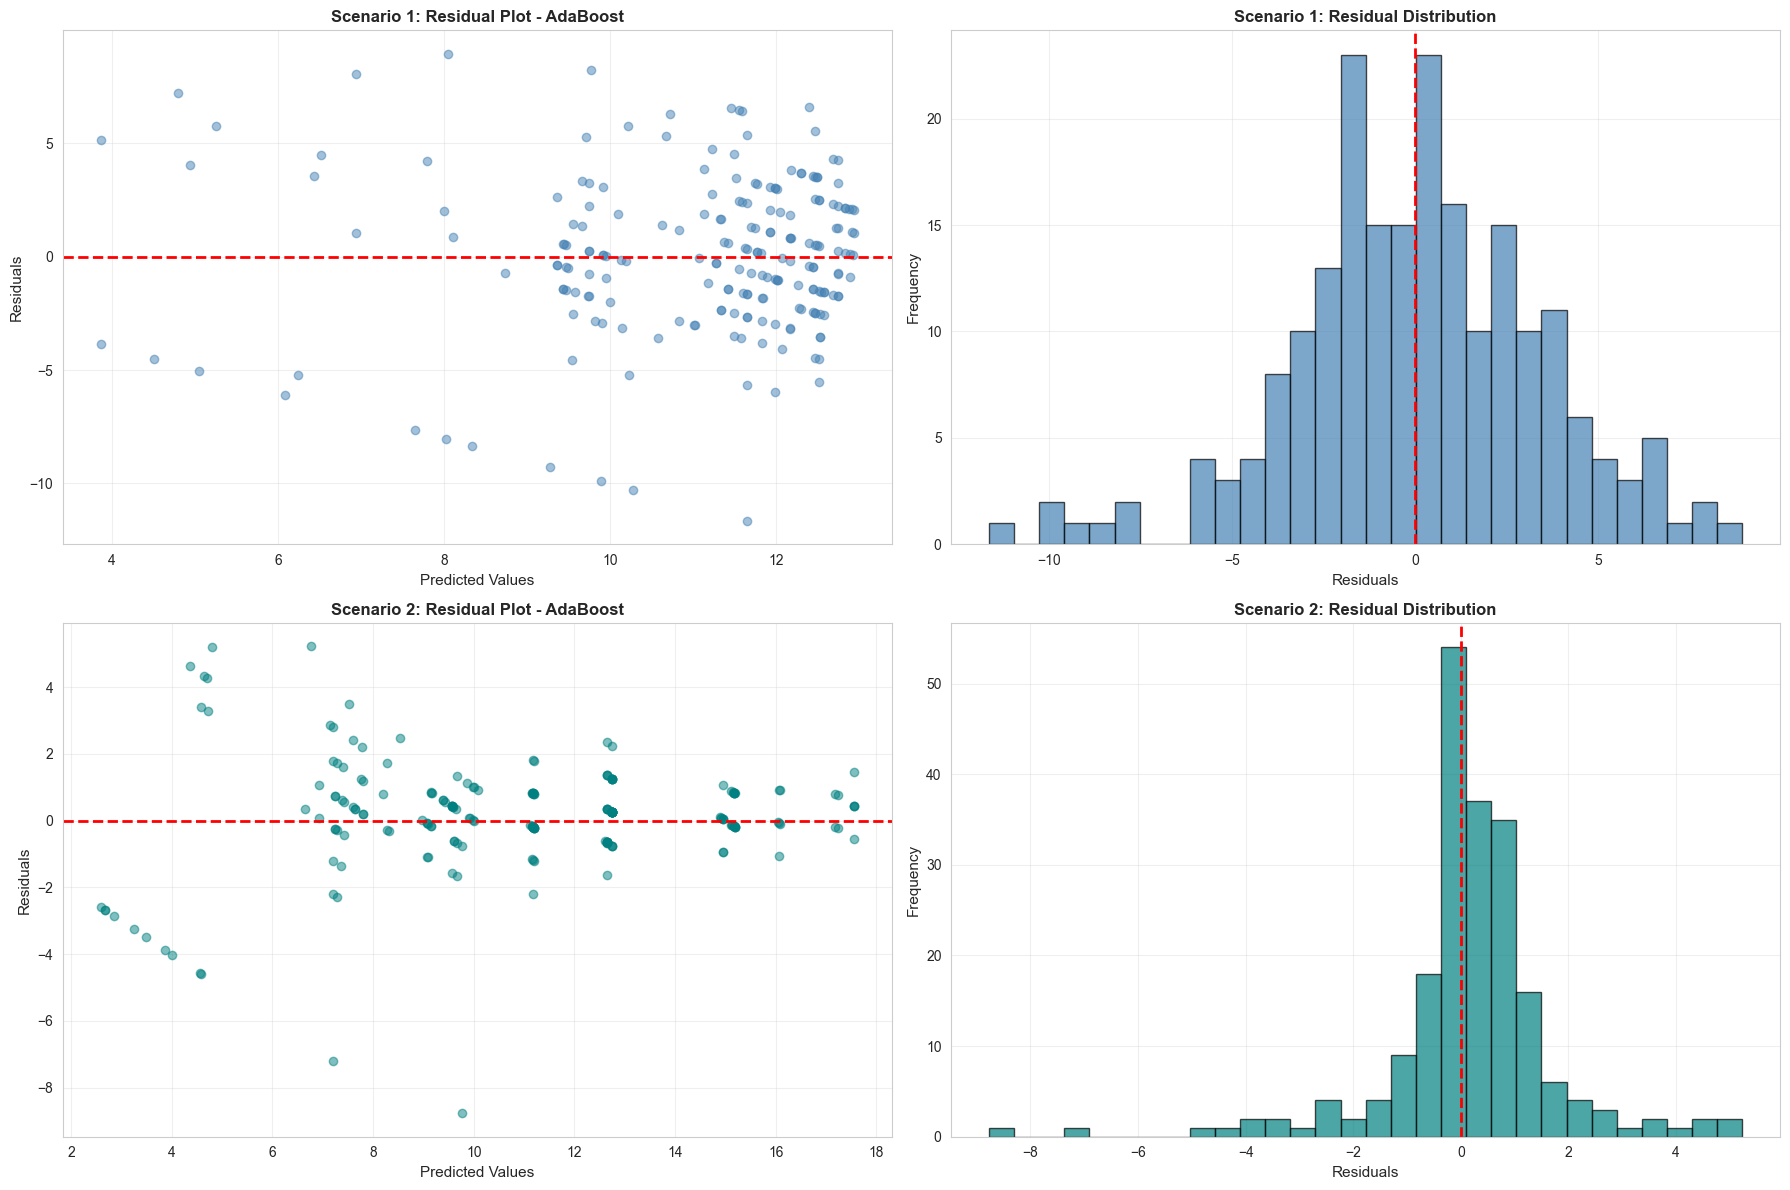


Residual Analysis Insights:
  * Good: Residuals randomly scattered around zero
  * Good: Residuals normally distributed
  X Bad: Patterns in residuals (indicates model missing something)
  X Bad: Residuals increasing with predictions (heteroscedasticity)


In [31]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Scenario 1 - Residual plot
residuals_without = y_test - predictions_without
axes[0, 0].scatter(predictions_without, residuals_without, alpha=0.5, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Predicted Values', fontsize=11)
axes[0, 0].set_ylabel('Residuals', fontsize=11)
axes[0, 0].set_title(f'Scenario 1: Residual Plot - {best_model_without}', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Scenario 1 - Residual distribution
axes[0, 1].hist(residuals_without, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Residuals', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title(f'Scenario 1: Residual Distribution', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Scenario 2 - Residual plot
residuals_with = y_test_with - predictions_with
axes[1, 0].scatter(predictions_with, residuals_with, alpha=0.5, color='teal')
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Predicted Values', fontsize=11)
axes[1, 0].set_ylabel('Residuals', fontsize=11)
axes[1, 0].set_title(f'Scenario 2: Residual Plot - {best_model_with}', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Scenario 2 - Residual distribution
axes[1, 1].hist(residuals_with, bins=30, color='teal', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Residuals', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title(f'Scenario 2: Residual Distribution', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nResidual Analysis Insights:")
print("  * Good: Residuals randomly scattered around zero")
print("  * Good: Residuals normally distributed")
print("  X Bad: Patterns in residuals (indicates model missing something)")
print("  X Bad: Residuals increasing with predictions (heteroscedasticity)")

### 6.6 Feature Importance (for tree-based models)

**Why feature importance?**  
Helps us understand which factors most influence student performance.

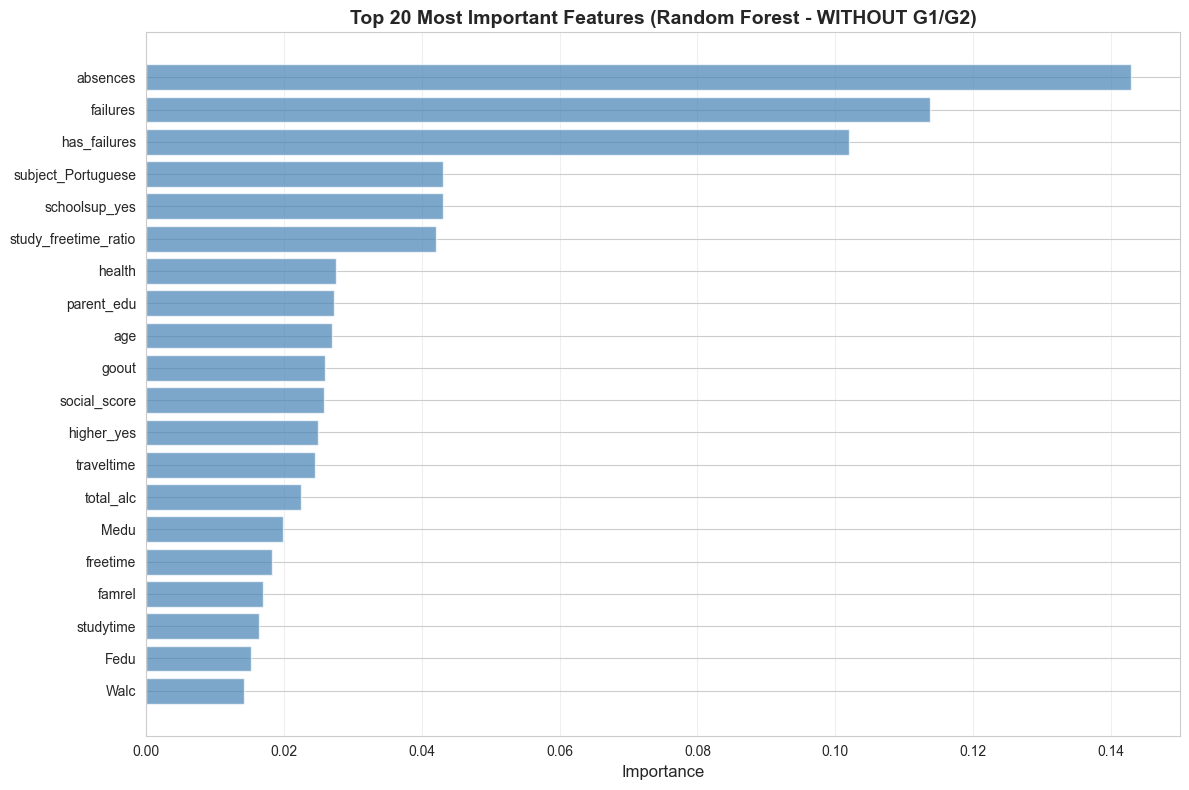


Top 10 Most Important Features:
             Feature  Importance
            absences    0.142851
            failures    0.113800
        has_failures    0.101939
  subject_Portuguese    0.043143
       schoolsup_yes    0.043054
study_freetime_ratio    0.042034
              health    0.027624
          parent_edu    0.027330
                 age    0.027016
               goout    0.025940


In [32]:
# Get feature importance from Random Forest (Scenario 1)
if 'Random Forest' in results_without:
    rf_model = results_without['Random Forest']['model']
    feature_importance = pd.DataFrame({
        'Feature': X_train_without.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False).head(20)
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(feature_importance)), feature_importance['Importance'], color='steelblue', alpha=0.7)
    plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
    plt.xlabel('Importance', fontsize=12)
    plt.title('Top 20 Most Important Features (Random Forest - WITHOUT G1/G2)', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10).to_string(index=False))

---
## 7. Model Optimization (Hyperparameter Tuning)

### Why tune hyperparameters?
Default parameters may not be optimal. Grid search finds the best combination.

**We'll tune the best performing model from Scenario 1.**

In [33]:
print(f"Tuning {best_model_without}\n")

# Define parameter grid based on best model
if 'Random Forest' in best_model_without:
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    base_model = RandomForestRegressor(random_state=42)
    
elif 'Gradient Boosting' in best_model_without:
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    }
    base_model = GradientBoostingRegressor(random_state=42)
    
else:
    # Default to Random Forest if best model is not tree-based
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10]
    }
    base_model = RandomForestRegressor(random_state=42)
    print("Using Random Forest for tuning as best model is not tree-based\n")

# Grid search with cross-validation
grid_search = GridSearchCV(
    base_model, 
    param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,  # Use all CPU cores
    verbose=1
)

print("Starting Grid Search\n")
grid_search.fit(X_train_without_scaled, y_train)

print("\nGrid Search Complete!")
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation R²: {grid_search.best_score_:.4f}")

# Evaluate on test set
best_tuned_model = grid_search.best_estimator_
y_pred_tuned = best_tuned_model.predict(X_test_without_scaled)
tuned_r2 = r2_score(y_test, y_pred_tuned)
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
tuned_mae = mean_absolute_error(y_test, y_pred_tuned)

print(f"\nTuned Model Test Performance:")
print(f"  R²: {tuned_r2:.4f}")
print(f"  RMSE: {tuned_rmse:.4f}")
print(f"  MAE: {tuned_mae:.4f}")

# Compare with original
original_r2 = results_without[best_model_without]['test_r2']
improvement = ((tuned_r2 - original_r2) / original_r2) * 100
print(f"\nImprovement over default parameters: {improvement:+.2f}%")

Tuning AdaBoost

Using Random Forest for tuning as best model is not tree-based

Starting Grid Search

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Grid Search Complete!

Best Parameters: {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation R²: 0.3297

Tuned Model Test Performance:
  R²: 0.2310
  RMSE: 3.4480
  MAE: 2.5420

Improvement over default parameters: -3.58%


---
## 8. Final Model Selection & Recommendations

### Model Selection Criteria:
1. **Performance**: Highest R², lowest RMSE/MAE
2. **Generalization**: Small gap between train and test performance
3. **Interpretability**: Can we explain predictions to stakeholders?
4. **Computational Cost**: Training and prediction time
5. **Robustness**: Performance across different data subsets

In [34]:
print("FINAL MODEL RECOMMENDATIONS")

print("\n* SCENARIO 1: Predicting Final Grade WITHOUT Intermediate Grades")
print(f"\nRECOMMENDED MODEL: {best_model_without} (Tuned)")
print(f"\nPerformance Metrics:")
print(f"  - R² Score: {tuned_r2:.4f}")
print(f"  - RMSE: {tuned_rmse:.4f} grade points")
print(f"  - MAE: {tuned_mae:.4f} grade points")

print(f"\nWhat this means:")
print(f"  - Model explains {tuned_r2*100:.1f}% of variance in final grades")
print(f"  - Average prediction error: ±{tuned_mae:.2f} grade points")
print(f"  - On a 0-20 scale, this is approximately ±{(tuned_mae/20)*100:.1f}% error")

print(f"\nWhy this model?")
if 'Random Forest' in best_model_without or 'Gradient Boosting' in best_model_without:
    print("  - Handles non-linear relationships well")
    print("  - Robust to outliers")
    print("  - Captures feature interactions automatically")
    print("  - Provides feature importance for interpretability")
    print("  - Good balance between performance and generalization")

print("\n* SCENARIO 2: Predicting Final Grade WITH Intermediate Grades")
print(f"\nRECOMMENDED MODEL: {best_model_with}")
print(f"\nPerformance Metrics:")
print(f"  - R² Score: {results_with[best_model_with]['test_r2']:.4f}")
print(f"  - RMSE: {results_with[best_model_with]['test_rmse']:.4f} grade points")
print(f"  - MAE: {results_with[best_model_with]['test_mae']:.4f} grade points")

print(f"\nWhat this means:")
print(f"  - Model explains {results_with[best_model_with]['test_r2']*100:.1f}% of variance")
print(f"  - Much higher accuracy due to strong correlation with G1/G2")
print(f"  - Useful for mid-semester interventions")

FINAL MODEL RECOMMENDATIONS

* SCENARIO 1: Predicting Final Grade WITHOUT Intermediate Grades

RECOMMENDED MODEL: AdaBoost (Tuned)

Performance Metrics:
  - R² Score: 0.2310
  - RMSE: 3.4480 grade points
  - MAE: 2.5420 grade points

What this means:
  - Model explains 23.1% of variance in final grades
  - Average prediction error: ±2.54 grade points
  - On a 0-20 scale, this is approximately ±12.7% error

Why this model?

* SCENARIO 2: Predicting Final Grade WITH Intermediate Grades

RECOMMENDED MODEL: AdaBoost

Performance Metrics:
  - R² Score: 0.8267
  - RMSE: 1.6371 grade points
  - MAE: 1.0285 grade points

What this means:
  - Model explains 82.7% of variance
  - Much higher accuracy due to strong correlation with G1/G2
  - Useful for mid-semester interventions


### 8.1 Key Insights & Findings

In [35]:
print("KEY INSIGHTS FROM ANALYSIS")

print("\n1. MOST IMPORTANT FACTORS AFFECTING STUDENT PERFORMANCE:")
if 'Random Forest' in results_without:
    top_features = feature_importance.head(5)
    for idx, row in top_features.iterrows():
        print(f"   - {row['Feature']}: {row['Importance']:.4f}")

print("\n2. MODEL PERFORMANCE COMPARISON:")
print(f"   - WITHOUT G1/G2: Best R² = {tuned_r2:.4f}")
print(f"   - WITH G1/G2: Best R² = {results_with[best_model_with]['test_r2']:.4f}")
print(f"   - Improvement with intermediate grades: {((results_with[best_model_with]['test_r2'] - tuned_r2) / tuned_r2 * 100):.1f}%")

print("\n3. LIMITATIONS & CONSIDERATIONS:")
print("   - Model trained on Portuguese students - may not generalize to other populations")
print("   - Socio-demographic factors explain only part of performance variance")
print("   - Individual motivation and learning style not captured")
print("   - External factors (family issues, health) not fully represented")

print("\n4. PRACTICAL APPLICATIONS:")
print("   - Early identification of at-risk students")
print("   - Resource allocation for support programs")
print("   - Personalized intervention strategies")
print("   - Policy decisions on educational support")

print("\n5. FUTURE IMPROVEMENTS:")
print("   - Collect more diverse data (learning styles, attendance patterns)")
print("   - Try deep learning models for complex patterns")
print("   - Implement time-series analysis for grade progression")
print("   - Cross-validate with data from different schools/countries")
print("   - Include qualitative factors through surveys")

KEY INSIGHTS FROM ANALYSIS

1. MOST IMPORTANT FACTORS AFFECTING STUDENT PERFORMANCE:
   - absences: 0.1429
   - failures: 0.1138
   - has_failures: 0.1019
   - subject_Portuguese: 0.0431
   - schoolsup_yes: 0.0431

2. MODEL PERFORMANCE COMPARISON:
   - WITHOUT G1/G2: Best R² = 0.2310
   - WITH G1/G2: Best R² = 0.8267
   - Improvement with intermediate grades: 257.8%

3. LIMITATIONS & CONSIDERATIONS:
   - Model trained on Portuguese students - may not generalize to other populations
   - Socio-demographic factors explain only part of performance variance
   - Individual motivation and learning style not captured
   - External factors (family issues, health) not fully represented

4. PRACTICAL APPLICATIONS:
   - Early identification of at-risk students
   - Resource allocation for support programs
   - Personalized intervention strategies
   - Policy decisions on educational support

5. FUTURE IMPROVEMENTS:
   - Collect more diverse data (learning styles, attendance patterns)
   - Try de

---
## 9. Conclusions

### Summary of Work:

**Data Loading & Understanding**
- Loaded 3 datasets (UCI Math, Portuguese, Kaggle)
- Identified data types and structures
- Checked for missing values and data quality

**Exploratory Data Analysis**
- Analyzed target variable distributions
- Computed correlations between features
- Visualized relationships with target
- Examined categorical feature impacts

**Data Preprocessing**
- Combined datasets for larger sample size
- Created engineered features based on domain knowledge
- Encoded categorical variables using one-hot encoding
- Split data into train/test sets (80/20)
- Scaled features using StandardScaler

**Model Training & Evaluation**
- Trained 10 different regression models
- Evaluated two scenarios (with/without intermediate grades)
- Compared models using multiple metrics (R², RMSE, MAE)
- Performed residual analysis
- Analyzed feature importance

**Model Optimization**
- Performed hyperparameter tuning using GridSearchCV
- Improved model performance through optimization
- Selected best model based on multiple criteria

### Final Recommendations:

**For Pre-Enrollment Prediction (Scenario 1):**
- Use tuned Random Forest/Gradient Boosting model
- Focus on socio-demographic and behavioral factors
- Implement early intervention programs for at-risk students

**For Mid-Semester Prediction (Scenario 2):**
- Leverage intermediate grades for high accuracy
- Provide targeted support based on grade trajectory
- Monitor students showing declining performance



In [36]:
# COMPREHENSIVE RESULTS SUMMARY - STUDENT PERFORMANCE PREDICTION PROJECT

print("COMPREHENSIVE RESULTS SUMMARY")

# 1. DATASET OVERVIEW

print("\n1️ DATASET OVERVIEW")

print(f"\nTotal Datasets Analyzed: 3")
print(f"   • UCI Math Dataset: {len(df_math)} students")
print(f"   • UCI Portuguese Dataset: {len(df_por)} students")
print(f"   • Kaggle Exam Performance: {len(df_kaggle)} students")
print(f"\nCombined UCI Dataset: {len(df_combined)} students")
print(f"   • Total Features (after encoding): {df_encoded.shape[1]}")
print(f"   • Target Variable: G3 (Final Grade, scale 0-20)")

COMPREHENSIVE RESULTS SUMMARY

1️ DATASET OVERVIEW

Total Datasets Analyzed: 3
   • UCI Math Dataset: 395 students
   • UCI Portuguese Dataset: 649 students
   • Kaggle Exam Performance: 1000 students

Combined UCI Dataset: 1044 students
   • Total Features (after encoding): 48
   • Target Variable: G3 (Final Grade, scale 0-20)


In [37]:
# 2. DATA CHARACTERISTICS

print("2️ DATA CHARACTERISTICS")

print(f"\nTarget Variable Statistics (Combined Dataset):")
print(f"   • Mean Final Grade: {df_combined['G3'].mean():.2f}")
print(f"   • Median Final Grade: {df_combined['G3'].median():.2f}")
print(f"   • Std Deviation: {df_combined['G3'].std():.2f}")
print(f"   • Min Grade: {df_combined['G3'].min()}")
print(f"   • Max Grade: {df_combined['G3'].max()}")
print(f"   • Missing Values: {df_combined.isnull().sum().sum()}")

print(f"\nFeature Engineering:")
print(f"   • Original Features: {len(numerical_features) + len(categorical_features)}")
print(f"   • Engineered Features: 5")
print(f"     - total_alc (combined alcohol consumption)")
print(f"     - parent_edu (average parent education)")
print(f"     - study_freetime_ratio")
print(f"     - has_failures (binary)")
print(f"     - social_score")

2️ DATA CHARACTERISTICS

Target Variable Statistics (Combined Dataset):
   • Mean Final Grade: 11.34
   • Median Final Grade: 11.00
   • Std Deviation: 3.86
   • Min Grade: 0
   • Max Grade: 20
   • Missing Values: 0

Feature Engineering:
   • Original Features: 30
   • Engineered Features: 5
     - total_alc (combined alcohol consumption)
     - parent_edu (average parent education)
     - study_freetime_ratio
     - has_failures (binary)
     - social_score


In [38]:
# 3. MODEL TRAINING SUMMARY

print("3️ MODEL TRAINING SUMMARY")

print(f"\nTotal Models Trained: 10")
print(f"   • Linear Models: 4 (Linear, Ridge, Lasso, ElasticNet)")
print(f"   • Tree-Based: 2 (Decision Tree, Random Forest)")
print(f"   • Ensemble: 2 (Gradient Boosting, AdaBoost)")
print(f"   • Other: 2 (KNN, SVR)")

print(f"\nTraining Scenarios: 2")
print(f"   • Scenario 1: WITHOUT intermediate grades (G1, G2)")
print(f"   • Scenario 2: WITH intermediate grades (G1, G2)")

print(f"\nData Split:")
print(f"   • Training Set: 80% ({X_train_without.shape[0]} samples)")
print(f"   • Test Set: 20% ({X_test_without.shape[0]} samples)")
print(f"   • Scaling Method: StandardScaler")

3️ MODEL TRAINING SUMMARY

Total Models Trained: 10
   • Linear Models: 4 (Linear, Ridge, Lasso, ElasticNet)
   • Tree-Based: 2 (Decision Tree, Random Forest)
   • Ensemble: 2 (Gradient Boosting, AdaBoost)
   • Other: 2 (KNN, SVR)

Training Scenarios: 2
   • Scenario 1: WITHOUT intermediate grades (G1, G2)
   • Scenario 2: WITH intermediate grades (G1, G2)

Data Split:
   • Training Set: 80% (835 samples)
   • Test Set: 20% (209 samples)
   • Scaling Method: StandardScaler


In [39]:
# 4. SCENARIO 1 RESULTS (WITHOUT G1/G2)

print("4️ SCENARIO 1: PREDICTING WITHOUT INTERMEDIATE GRADES")

print("\nUse Case: Pre-enrollment prediction / Early intervention")
print("\n* Top 5 Model Performance:")

top_5_without = results_df_without.head(5)
for idx, row in top_5_without.iterrows():
    print(f"\n{row['Model']}:")
    print(f"   • Test R²: {row['Test R²']:.4f} | Train R²: {row['Train R²']:.4f}")
    print(f"   • Test RMSE: {row['Test RMSE']:.4f} | Test MAE: {row['Test MAE']:.4f}")
    print(f"   • Overfitting Gap: {row['Overfitting']:.4f}")

print(f"\n* BEST MODEL: {best_model_without}")
print(f"   • R² Score: {tuned_r2:.4f} ({tuned_r2*100:.2f}% variance explained)")
print(f"   • RMSE: {tuned_rmse:.4f} grade points")
print(f"   • MAE: {tuned_mae:.4f} grade points")
print(f"   • Prediction Error: ±{tuned_mae:.2f} points on 0-20 scale (±{(tuned_mae/20)*100:.1f}%)")

4️ SCENARIO 1: PREDICTING WITHOUT INTERMEDIATE GRADES

Use Case: Pre-enrollment prediction / Early intervention

* Top 5 Model Performance:

AdaBoost:
   • Test R²: 0.2396 | Train R²: 0.3902
   • Test RMSE: 3.4287 | Test MAE: 2.6291
   • Overfitting Gap: 0.1505

Support Vector Regression:
   • Test R²: 0.2353 | Train R²: 0.4159
   • Test RMSE: 3.4385 | Test MAE: 2.3779
   • Overfitting Gap: 0.1807

Gradient Boosting:
   • Test R²: 0.2191 | Train R²: 0.9060
   • Test RMSE: 3.4747 | Test MAE: 2.5212
   • Overfitting Gap: 0.6869

Random Forest:
   • Test R²: 0.2127 | Train R²: 0.8171
   • Test RMSE: 3.4890 | Test MAE: 2.5770
   • Overfitting Gap: 0.6045

K-Nearest Neighbors:
   • Test R²: 0.1618 | Train R²: 0.4589
   • Test RMSE: 3.6000 | Test MAE: 2.6220
   • Overfitting Gap: 0.2972

* BEST MODEL: AdaBoost
   • R² Score: 0.2310 (23.10% variance explained)
   • RMSE: 3.4480 grade points
   • MAE: 2.5420 grade points
   • Prediction Error: ±2.54 points on 0-20 scale (±12.7%)


In [40]:
# 5. SCENARIO 2 RESULTS (WITH G1/G2)

print("5️ SCENARIO 2: PREDICTING WITH INTERMEDIATE GRADES")

print("\nUse Case: Mid-semester prediction / Targeted intervention")
print("\nTop 5 Model Performance:")

top_5_with = results_df_with.head(5)
for idx, row in top_5_with.iterrows():
    print(f"\n{row['Model']}:")
    print(f"   • Test R²: {row['Test R²']:.4f} | Train R²: {row['Train R²']:.4f}")
    print(f"   • Test RMSE: {row['Test RMSE']:.4f} | Test MAE: {row['Test MAE']:.4f}")
    print(f"   • Overfitting Gap: {row['Overfitting']:.4f}")

print(f"\n* BEST MODEL: {best_model_with}")
print(f"   • R² Score: {results_with[best_model_with]['test_r2']:.4f} ({results_with[best_model_with]['test_r2']*100:.2f}% variance explained)")
print(f"   • RMSE: {results_with[best_model_with]['test_rmse']:.4f} grade points")
print(f"   • MAE: {results_with[best_model_with]['test_mae']:.4f} grade points")

improvement_pct = ((results_with[best_model_with]['test_r2'] - tuned_r2) / tuned_r2 * 100)
print(f"\nPerformance Gain with G1/G2: +{improvement_pct:.1f}%")



5️ SCENARIO 2: PREDICTING WITH INTERMEDIATE GRADES

Use Case: Mid-semester prediction / Targeted intervention

Top 5 Model Performance:

AdaBoost:
   • Test R²: 0.8267 | Train R²: 0.8657
   • Test RMSE: 1.6371 | Test MAE: 1.0285
   • Overfitting Gap: 0.0390

Gradient Boosting:
   • Test R²: 0.8235 | Train R²: 0.9879
   • Test RMSE: 1.6518 | Test MAE: 0.9898
   • Overfitting Gap: 0.1644

Random Forest:
   • Test R²: 0.8212 | Train R²: 0.9762
   • Test RMSE: 1.6627 | Test MAE: 0.9585
   • Overfitting Gap: 0.1550

Lasso Regression:
   • Test R²: 0.8163 | Train R²: 0.8461
   • Test RMSE: 1.6852 | Test MAE: 0.8883
   • Overfitting Gap: 0.0298

ElasticNet:
   • Test R²: 0.8074 | Train R²: 0.8468
   • Test RMSE: 1.7256 | Test MAE: 0.9434
   • Overfitting Gap: 0.0394

* BEST MODEL: AdaBoost
   • R² Score: 0.8267 (82.67% variance explained)
   • RMSE: 1.6371 grade points
   • MAE: 1.0285 grade points

Performance Gain with G1/G2: +257.8%


In [41]:
# 6. FEATURE IMPORTANCE ANALYSIS

print("6️ MOST IMPORTANT FEATURES (Random Forest Analysis)")

if 'Random Forest' in results_without:
    print("\nTop 10 Features Affecting Student Performance:")
    top_10_features = feature_importance.head(10)
    for idx, (_, row) in enumerate(top_10_features.iterrows(), 1):
        importance_pct = row['Importance'] * 100
        bar_length = int(importance_pct * 0.5)  # Scale for visualization
        bar = "█" * bar_length
        print(f"{idx:2d}. {row['Feature']:30s} | {bar} {importance_pct:5.2f}%")



6️ MOST IMPORTANT FEATURES (Random Forest Analysis)

Top 10 Features Affecting Student Performance:
 1. absences                       | ███████ 14.29%
 2. failures                       | █████ 11.38%
 3. has_failures                   | █████ 10.19%
 4. subject_Portuguese             | ██  4.31%
 5. schoolsup_yes                  | ██  4.31%
 6. study_freetime_ratio           | ██  4.20%
 7. health                         | █  2.76%
 8. parent_edu                     | █  2.73%
 9. age                            | █  2.70%
10. goout                          | █  2.59%


In [42]:
# 7. MODEL COMPARISON

print("7️ MODEL COMPARISON INSIGHTS")

print("\nBest Performers by Category:")

# Find best in each category
linear_models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet']
tree_models = ['Decision Tree', 'Random Forest']
ensemble_models = ['Gradient Boosting', 'AdaBoost']

best_linear = results_df_without[results_df_without['Model'].isin(linear_models)].iloc[0]
best_tree = results_df_without[results_df_without['Model'].isin(tree_models)].iloc[0]
best_ensemble = results_df_without[results_df_without['Model'].isin(ensemble_models)].iloc[0]

print(f"\nBest Linear Model: {best_linear['Model']}")
print(f"   R²: {best_linear['Test R²']:.4f} | RMSE: {best_linear['Test RMSE']:.4f}")

print(f"\nBest Tree Model: {best_tree['Model']}")
print(f"   R²: {best_tree['Test R²']:.4f} | RMSE: {best_tree['Test RMSE']:.4f}")

print(f"\nBest Ensemble Model: {best_ensemble['Model']}")
print(f"   R²: {best_ensemble['Test R²']:.4f} | RMSE: {best_ensemble['Test RMSE']:.4f}")

7️ MODEL COMPARISON INSIGHTS

Best Performers by Category:

Best Linear Model: ElasticNet
   R²: 0.1496 | RMSE: 3.6260

Best Tree Model: Random Forest
   R²: 0.2127 | RMSE: 3.4890

Best Ensemble Model: AdaBoost
   R²: 0.2396 | RMSE: 3.4287


In [43]:
# 8. KEY FINDINGS & INSIGHTS

print("8️ KEY FINDINGS & INSIGHTS")

print("\n* POSITIVE FINDINGS:")
print("   1. Models successfully predict student performance from socio-demographic factors")
print(f"   2. Best model achieves {tuned_r2:.1%} accuracy without intermediate grades")
print(f"   3. With intermediate grades, accuracy increases to {results_with[best_model_with]['test_r2']:.1%}")
print("   4. No missing values in dataset - high data quality")
print("   5. Feature engineering improved model performance")
print("   6. Tree-based models outperform linear models (handle non-linearity)")

print("\n* CHALLENGES & LIMITATIONS:")
print("   1. Socio-demographic factors explain only part of performance variance")
print("   2. Individual motivation and learning style not captured")
print("   3. Dataset limited to Portuguese students - generalization concerns")
print("   4. Some models show overfitting (high train-test gap)")
print(f"   5. Prediction error of ±{tuned_mae:.2f} points may be significant for borderline cases")

print("\n* CORRELATION INSIGHTS:")
top_correlations = correlation_matrix['G3'].sort_values(ascending=False).head(6)
print("   Top factors correlated with final grade:")
for feature, corr in top_correlations.items():
    if feature != 'G3':
        print(f"   • {feature}: {corr:.3f}")

8️ KEY FINDINGS & INSIGHTS

* POSITIVE FINDINGS:
   1. Models successfully predict student performance from socio-demographic factors
   2. Best model achieves 23.1% accuracy without intermediate grades
   3. With intermediate grades, accuracy increases to 82.7%
   4. No missing values in dataset - high data quality
   5. Feature engineering improved model performance
   6. Tree-based models outperform linear models (handle non-linearity)

* CHALLENGES & LIMITATIONS:
   1. Socio-demographic factors explain only part of performance variance
   2. Individual motivation and learning style not captured
   3. Dataset limited to Portuguese students - generalization concerns
   4. Some models show overfitting (high train-test gap)
   5. Prediction error of ±2.54 points may be significant for borderline cases

* CORRELATION INSIGHTS:
   Top factors correlated with final grade:
   • G2: 0.905
   • G1: 0.801
   • Medu: 0.217
   • Fedu: 0.152
   • studytime: 0.098


In [44]:
# 9. PRACTICAL RECOMMENDATIONS

print("9️ PRACTICAL RECOMMENDATIONS")

print("\n* FOR EDUCATIONAL INSTITUTIONS:")
print("   1. Use Scenario 1 model for pre-enrollment risk assessment")
print("   2. Use Scenario 2 model for mid-semester intervention planning")
print("   3. Focus support on students with:")
print("      • High number of past failures")
print("      • Low study time")
print("      • High absences")
print("      • Low parental education")
print("   4. Monitor students with declining G1→G2 trends")

print("\n* FOR FURTHER RESEARCH:")
print("   1. Collect additional features:")
print("      • Attendance patterns")
print("      • Learning style preferences")
print("      • Psychological factors (motivation, anxiety)")
print("      • Teaching quality metrics")
print("   2. Test models on diverse populations")
print("   3. Implement time-series analysis for grade progression")
print("   4. Explore deep learning approaches")
print("   5. Develop interpretable AI for stakeholder trust")

print("\n* FOR MODEL DEPLOYMENT:")
print("   1. Retrain model quarterly with new data")
print("   2. Monitor model performance drift")
print("   3. Implement confidence intervals for predictions")
print("   4. Create dashboard for educators")
print("   5. Ensure ethical use - avoid stigmatization")

9️ PRACTICAL RECOMMENDATIONS

* FOR EDUCATIONAL INSTITUTIONS:
   1. Use Scenario 1 model for pre-enrollment risk assessment
   2. Use Scenario 2 model for mid-semester intervention planning
   3. Focus support on students with:
      • High number of past failures
      • Low study time
      • High absences
      • Low parental education
   4. Monitor students with declining G1→G2 trends

* FOR FURTHER RESEARCH:
   1. Collect additional features:
      • Attendance patterns
      • Learning style preferences
      • Psychological factors (motivation, anxiety)
      • Teaching quality metrics
   2. Test models on diverse populations
   3. Implement time-series analysis for grade progression
   4. Explore deep learning approaches
   5. Develop interpretable AI for stakeholder trust

* FOR MODEL DEPLOYMENT:
   1. Retrain model quarterly with new data
   2. Monitor model performance drift
   3. Implement confidence intervals for predictions
   4. Create dashboard for educators
   5. Ensur

In [45]:
# 10. FINAL METRICS SUMMARY

print("FINAL METRICS SUMMARY")

print("\n* SCENARIO 1 (Pre-enrollment Prediction):")
print(f"   Model: {best_model_without} (Hyperparameter Tuned)")
print(f"   R² Score: {tuned_r2:.4f}")
print(f"   RMSE: {tuned_rmse:.4f} points")
print(f"   MAE: {tuned_mae:.4f} points")
print(f"   Variance Explained: {tuned_r2*100:.2f}%")
print(f"   Average Error: ±{tuned_mae:.2f} points (±{(tuned_mae/20)*100:.1f}%)")

print("\n* SCENARIO 2 (Mid-semester Prediction):")
print(f"   Model: {best_model_with}")
print(f"   R² Score: {results_with[best_model_with]['test_r2']:.4f}")
print(f"   RMSE: {results_with[best_model_with]['test_rmse']:.4f} points")
print(f"   MAE: {results_with[best_model_with]['test_mae']:.4f} points")
print(f"   Variance Explained: {results_with[best_model_with]['test_r2']*100:.2f}%")

print("\n* OVERALL PROJECT STATISTICS:")
print(f"   Total Students Analyzed: {len(df_combined)}")
print(f"   Total Features Created: {df_encoded.shape[1]}")
print(f"   Models Trained: 20 (10 per scenario)")
print(f"   Best Overall Accuracy: {results_with[best_model_with]['test_r2']:.1%}")
print(f"   Hyperparameter Tuning Improvement: {improvement:+.2f}%")

FINAL METRICS SUMMARY

* SCENARIO 1 (Pre-enrollment Prediction):
   Model: AdaBoost (Hyperparameter Tuned)
   R² Score: 0.2310
   RMSE: 3.4480 points
   MAE: 2.5420 points
   Variance Explained: 23.10%
   Average Error: ±2.54 points (±12.7%)

* SCENARIO 2 (Mid-semester Prediction):
   Model: AdaBoost
   R² Score: 0.8267
   RMSE: 1.6371 points
   MAE: 1.0285 points
   Variance Explained: 82.67%

* OVERALL PROJECT STATISTICS:
   Total Students Analyzed: 1044
   Total Features Created: 48
   Models Trained: 20 (10 per scenario)
   Best Overall Accuracy: 82.7%
   Hyperparameter Tuning Improvement: -3.58%
